 ## Credit Card Default Prediction

 Life cycle of Machine Learning Project

   1. Understanding the Problem Statements
   2. Data Collection
   3. Data Check to perform
   4. Exploratory data analysis
   5. Data Pre-Processing
   6. Model Training
   7. Choose best model

## 1.Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

## Data Collection

Data Source - https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?resource=download
 

## 2.1 Import Data and Required Packages

Importing Pandas,Numpy,Matplotlib,Seaborn and Warings Libary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Optionally, you can suppress warnings
warnings.filterwarnings("ignore")


## Import the CSV Data as Pandas DataFrame

In [3]:
df =pd.read_csv('credit card.csv')

## Show Top 5 Records

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Shape of the dataset

In [5]:
df.shape

(30000, 25)

## 2.2 Dataset information

 * ID: ID of each client
 * LIMIT_BAL: Amount of given credit in NT  dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

   

## 3. Data Check to Perform
   
   * Check missing values
   * Check Duplicates
   * Check data type
   * Check the number of unique values of each column
   * Check statistics of data set
   * Check various categories present in the different categorical columnn

## 3.1 Check Missing Values

In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates values in the data set

## 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

## 3.5 Check statistics of data set

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Litreture Survey
 There are 25 columns in the Dataset
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in New Taiwan  dollars (includes individual and family/supplementary credit)
* SEX: Gender where 1 represents Male and 2 Represents Female

In [11]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

df['SEX']

In [12]:
df['SEX']

0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64

In [13]:

df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [14]:

df['EDUCATION']

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64

MARRIAGE: Marital status where 1 is married, 2 is single and 3 is others and 0 is unknown

In [15]:

df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [16]:
df['MARRIAGE']

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

AGE: Age in years

In [17]:

df['AGE'].min()

21

In [18]:

df['AGE'].max()

79


* PAY_0: Repayment status in September, 2005
* PAY_2: Repayment status in August, 2005
* PAY_3: Repayment status in July, 2005
* PAY_4: Repayment status in June, 2005
* PAY_5: Repayment status in May, 2005
* PAY_6: Repayment status in April, 2005
For all the above -1 represents fully paid,1 represents payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [19]:

df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [20]:
df['PAY_2'].value_counts()

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
BILL_AMT represents Amount of Bill statement in corresponding months

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
PAY_AMT represents Amount of previous payment for the corresponding month

In [21]:
df["default.payment.next.month"].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

## "Exploreatry Data Analysis" & "Feature Enginnering"

In [22]:
df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [23]:

df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [24]:
df['Default'].groupby(df['SEX']).value_counts(normalize = True)

SEX  Default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: proportion, dtype: float64

In [25]:
logging.info("Using visualization for better undertanding")

NameError: name 'logging' is not defined

ValueError: Could not interpret value `index` for `x`. An entry with this name does not appear in `data`.

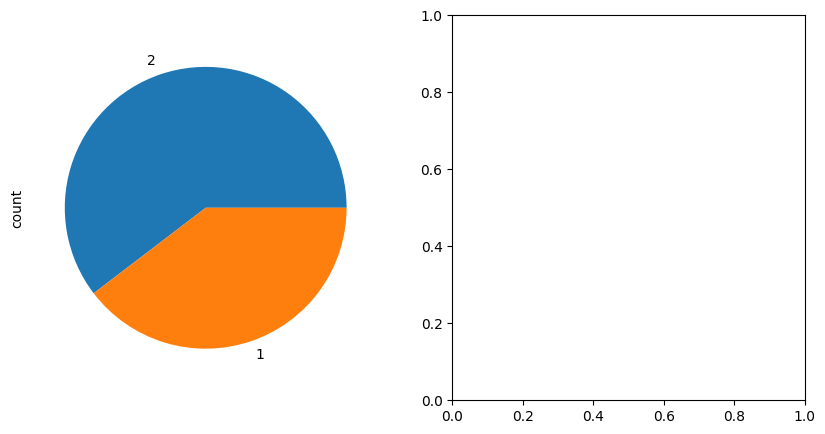

<Figure size 1300x800 with 0 Axes>

In [26]:

fig, axes = plt.subplots(ncols=2,figsize=(10,5))
Day_df=df['SEX'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
ax = sns.barplot(x='index',y='SEX',data=Day_df,ax = axes[1])

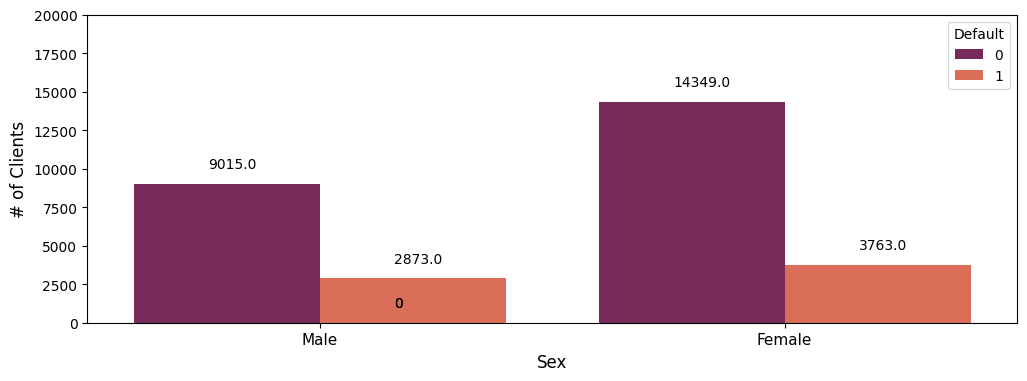

In [27]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

There are more women than men in our dataset and, comparitively, men have a slightly higher chance of default.

## EDUCATION

In [28]:

df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

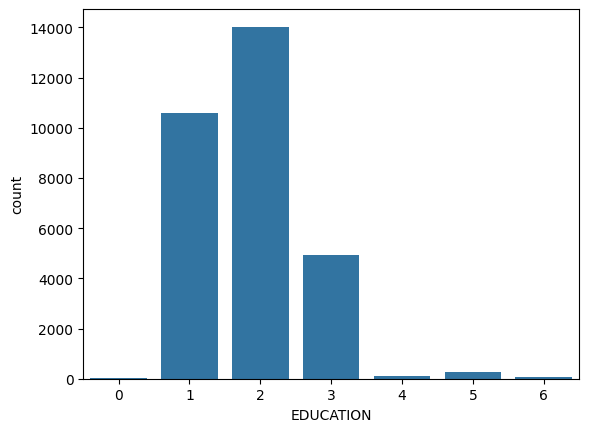

In [29]:

sns.countplot(data=df,x='EDUCATION')

In [30]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: proportion, dtype: float64


There are few people on the 'unknown' categories (0, 5, 6) and, although their probabilities of default are not exactly close, all of them are lower than the probabilities found for the 'well defined' labels (1, 2 and 3). I'll be making the choice of putting them together with the same value

In [31]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [32]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      345
4      123
Name: count, dtype: int64

In [33]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.924638
           1          0.075362
Name: proportion, dtype: float64

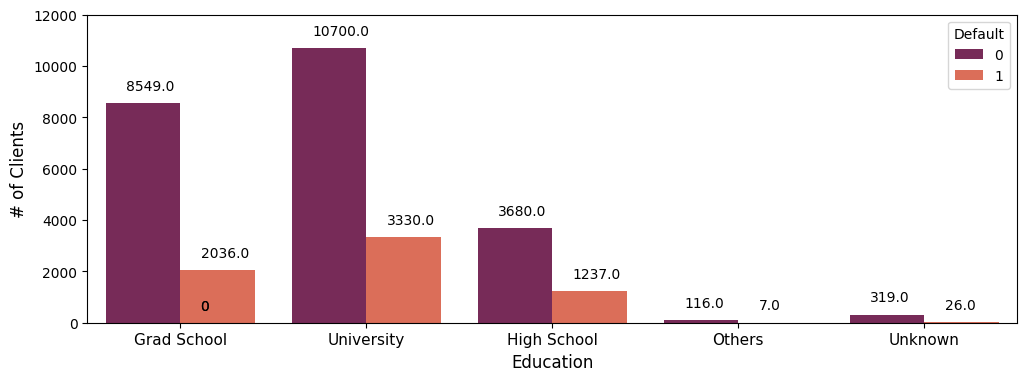

In [34]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

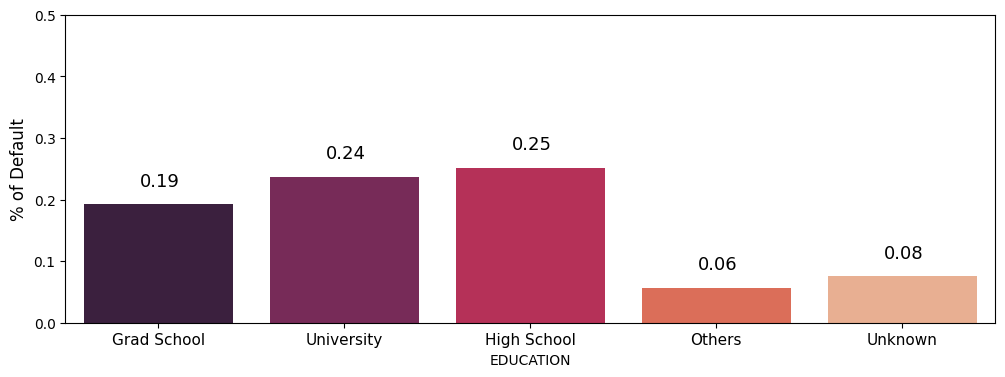

In [35]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()


According to the education coloum, those who are educated they are less chance to be default

Considering only the first three levels, it seems that a higher education translates to a lower chance of default. However, both 'Unknown' and 'Others' (which we would presume that it means a lower level than high school), have a noticeably lower probability


## MARITAL STATUS

In [36]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

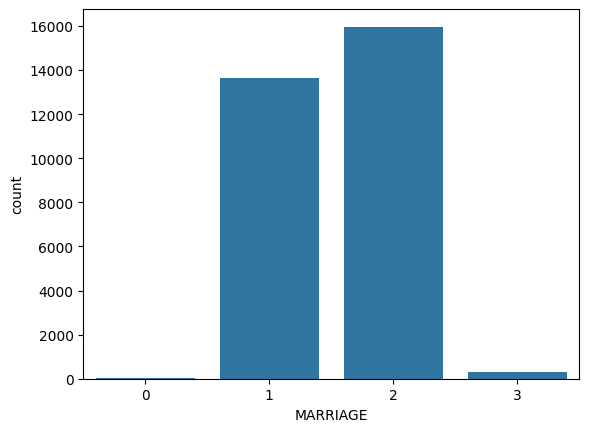

In [37]:
sns.countplot(data=df,x='MARRIAGE')


In [38]:
df['Default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  Default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: proportion, dtype: float64

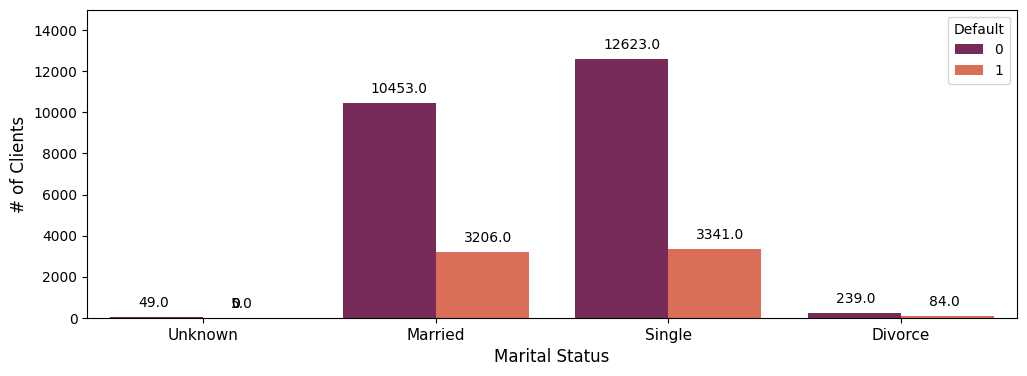

In [39]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

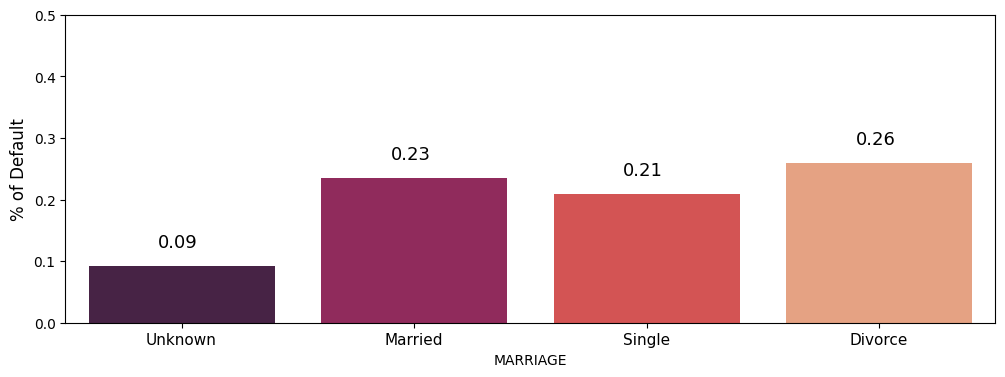

In [40]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, most people fall either on the 'Married' or 'Single' category.

Once again, the 'Unknown' category present a lower probability of default. Among the rest, those who are single have a slight lower chance of default, while the people who got divorced are more likely to default.

## Sex /Marital Status

In [41]:
df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)

MARRIAGE  SEX  Default
0         1    0          0.857143
               1          0.142857
          2    0          0.925000
               1          0.075000
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.694656
               1          0.305344
          2    0          0.770833
               1          0.229167
Name: proportion, dtype: float64

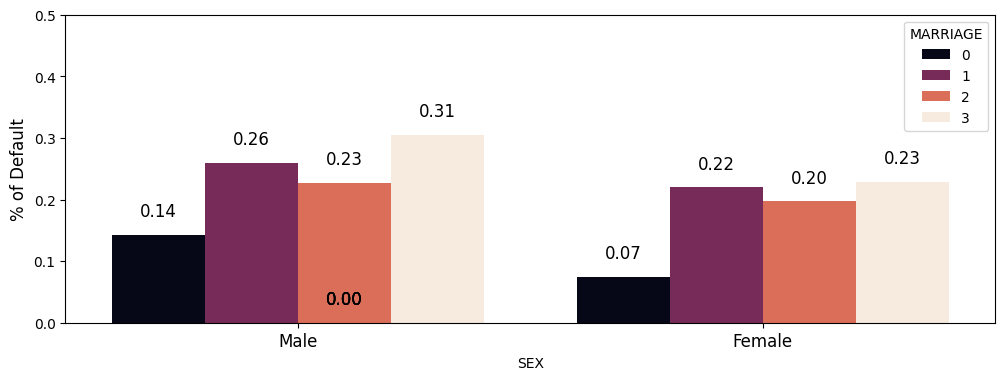

In [42]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In every single comparison, the probability of default was higher for men.


## AGE

<Axes: xlabel='AGE', ylabel='count'>

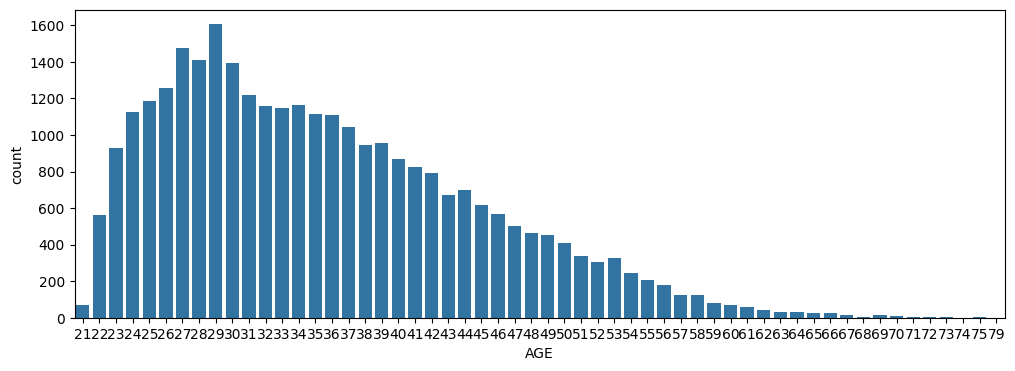

In [43]:
plt.figure(figsize = (12,4))
sns.countplot(data=df,x='AGE')

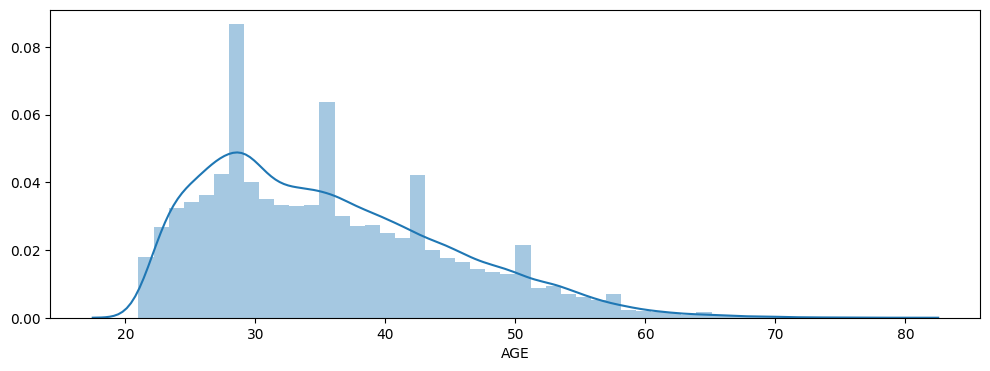

In [44]:
plt.figure(figsize=(12,4))

sns.distplot(df['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

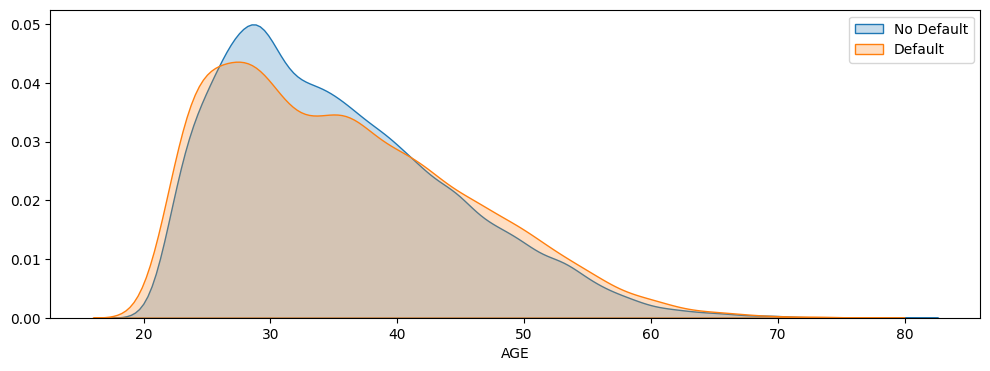

In [45]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()


Most people in our dataset have between 25 and 40 years old. There is also an impression that around that age the chance of default is a little lower, but we could divide our dataset in bins and check the percentage of default in each age group to be sure.

In [46]:

df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

AgeBin
(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: count, dtype: int64


In [47]:
df['Default'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin    Default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: proportion, dtype: float64

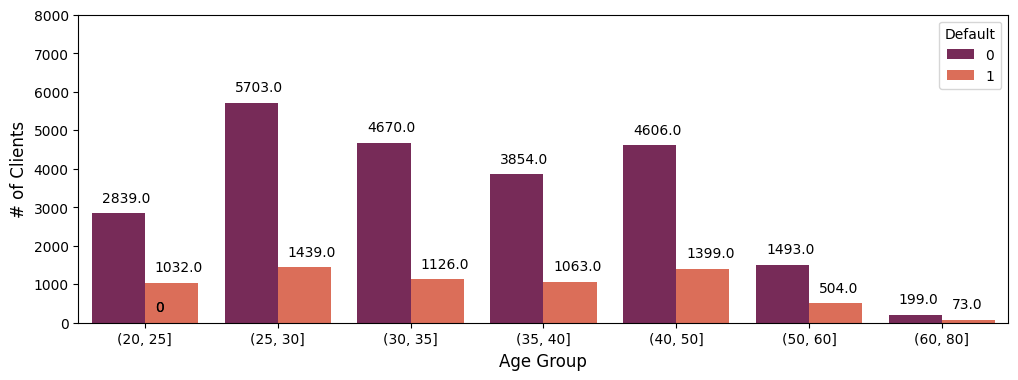

In [48]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="Default", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

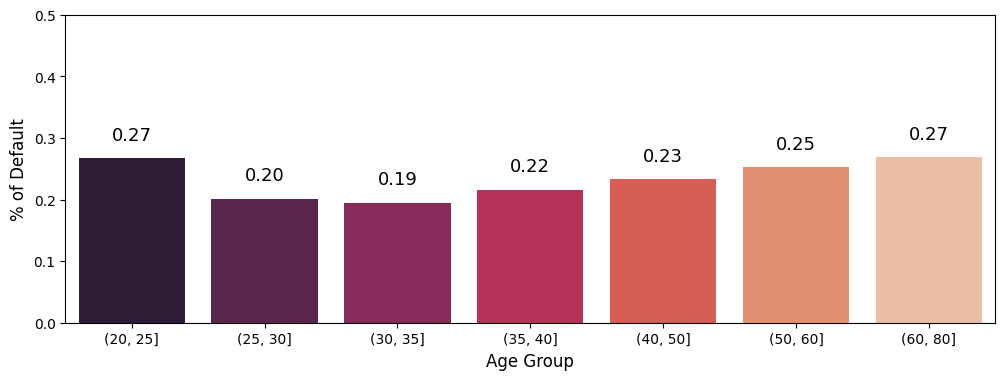

In [49]:

plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "Default", data = df, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, the lowest chances of default are registered around 30-35 years old, while the highest occur at the extremes (20-25 and 60+).

## Amount of Given Credit (LIMIT_BAL)

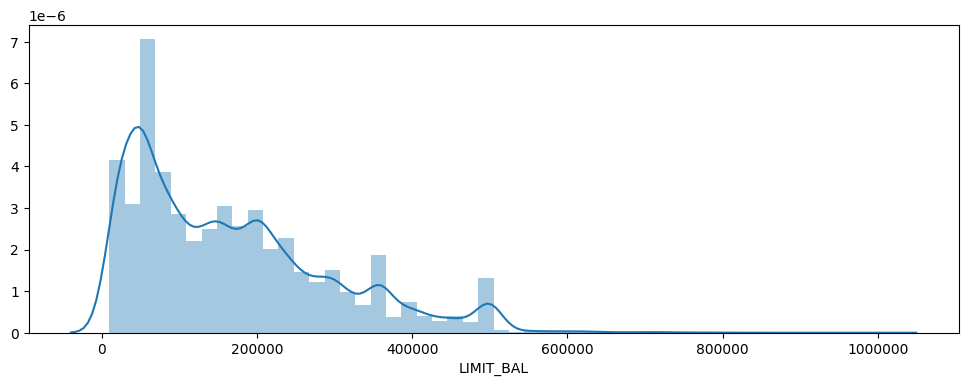

In [50]:
plt.figure(figsize=(12,4))

sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

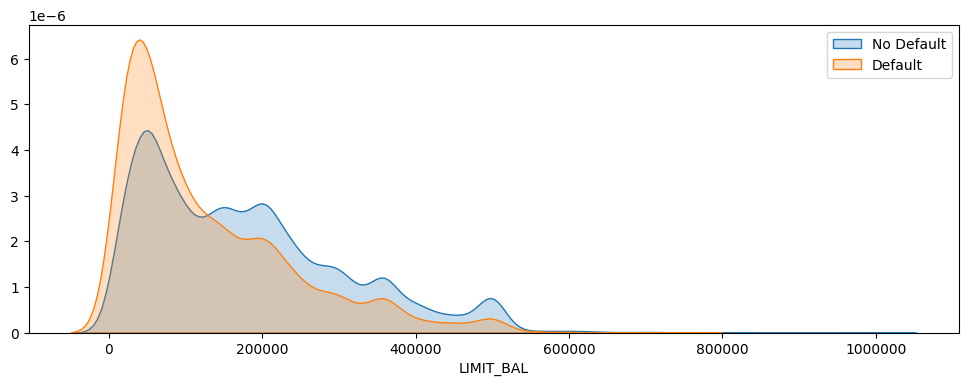

In [51]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()


Most customers have 200k or less of credit limit. And it seems that we will find a higher concentration of customers in default on that range. We will split it into bins to get a clear look.

In [52]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

LimitBin
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: count, dtype: int64


In [53]:
df['Default'].groupby(df['LimitBin']).value_counts(normalize = True)

LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: proportion, dtype: float64

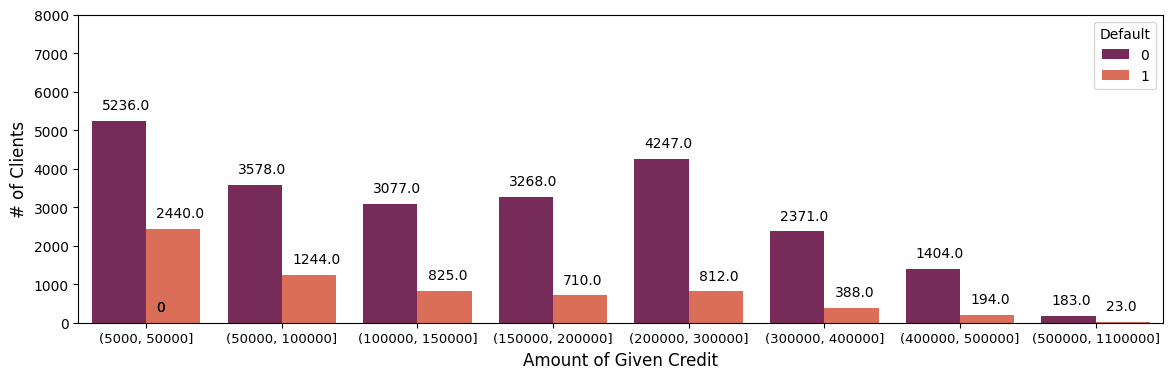

In [54]:
plt.figure(figsize=(14,4))

df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'LimitBin', hue="Default", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

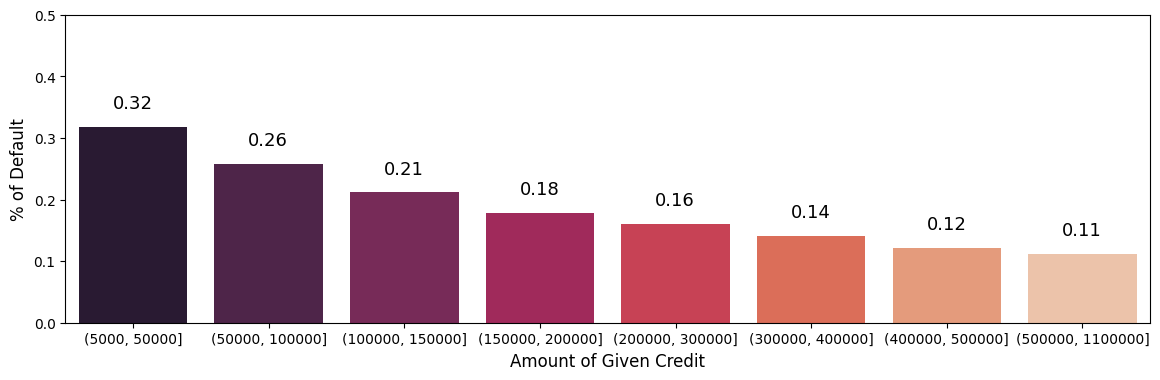

In [55]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "Default", data = df, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()


Now it's pretty clear that there is a significant rate of default (over 30%) from customers with 50k or less of credit limit. We also can see that the higher the limit, the lower is the chance of defaulting.

## Amount of Given Credit (LIMIT_BAL) + Demographic Features

In [56]:
df.groupby('SEX')['LIMIT_BAL'].mean()

SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64

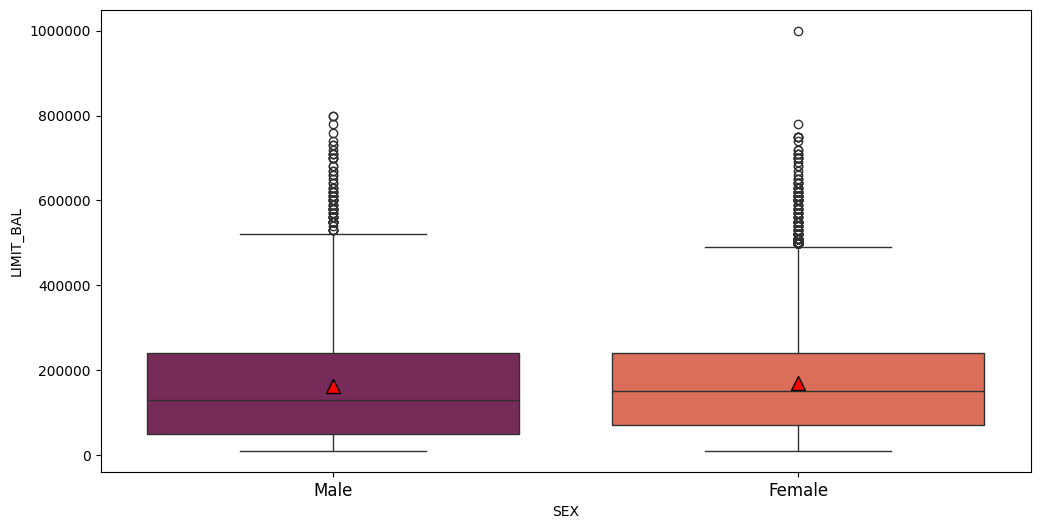

In [57]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [58]:
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    167205.797101
Name: LIMIT_BAL, dtype: float64

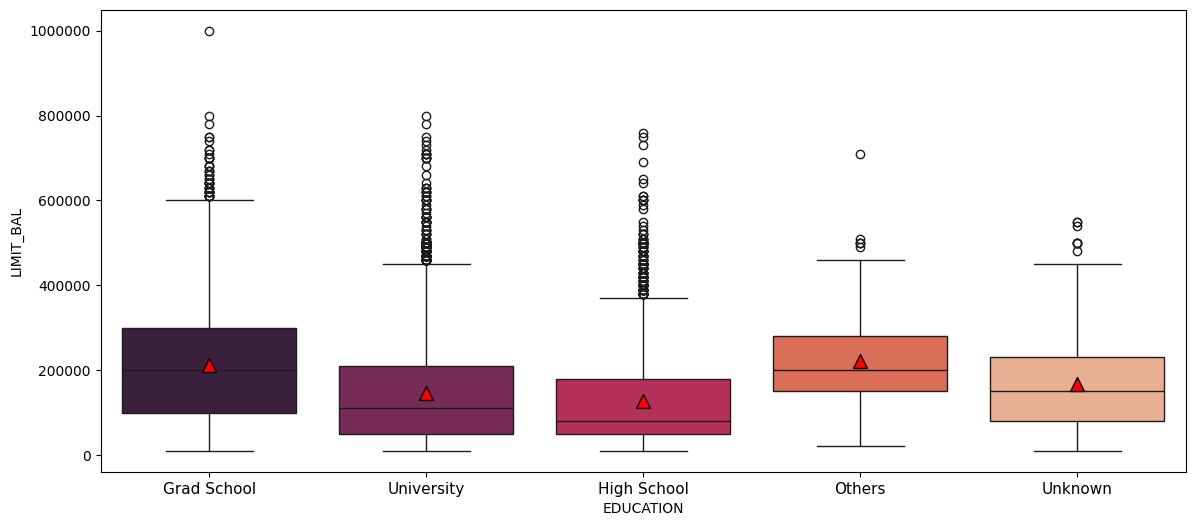

In [59]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

In [60]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

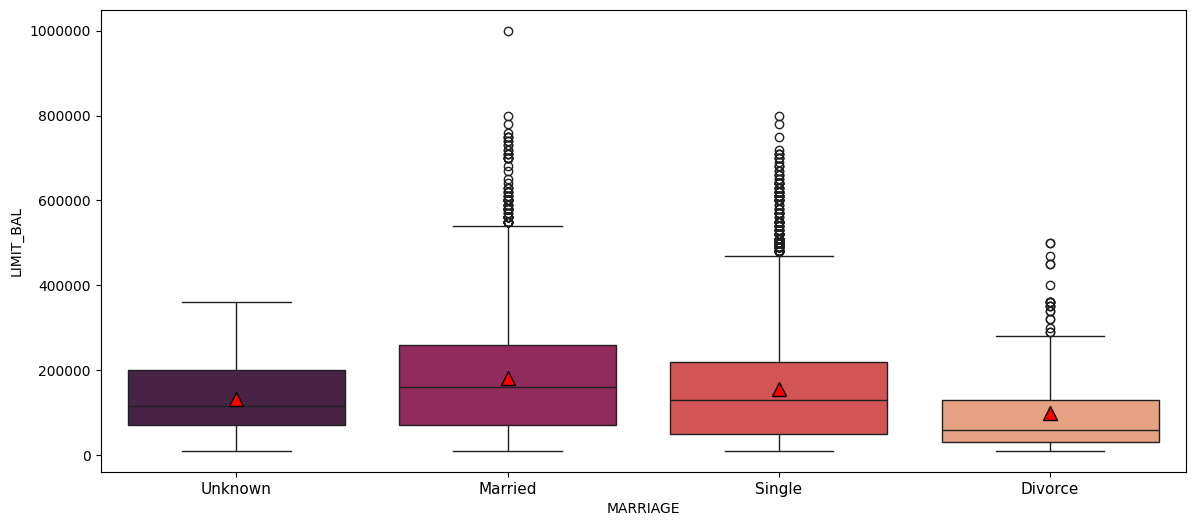

In [61]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

In [62]:
df.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

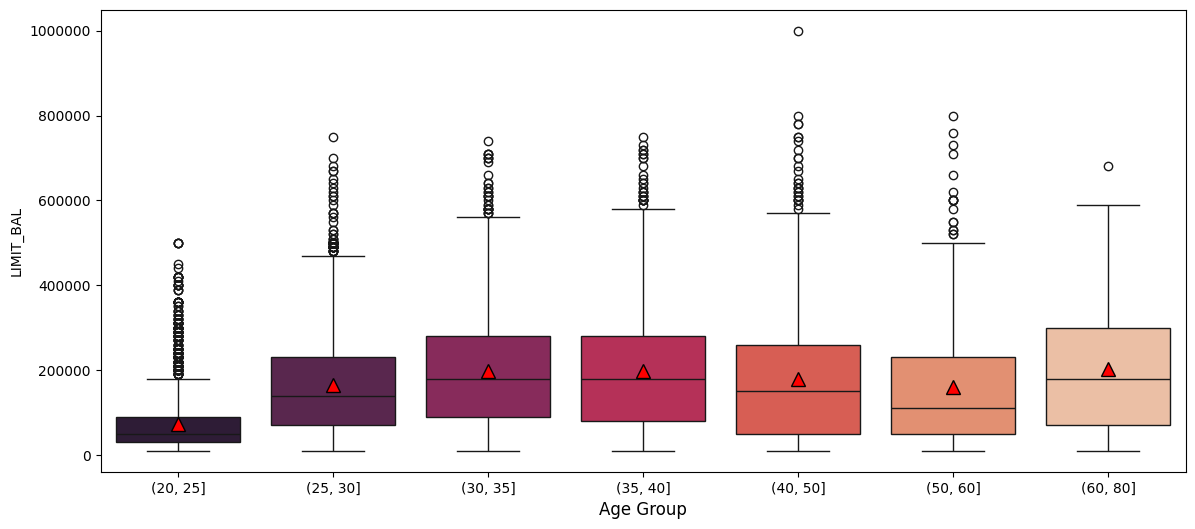

In [63]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

Overall, the offered credit limit seems to match the ability to pay in time within each category. The exceptions are the unknown categories, which have lower chances of default, but do not lead in the amount of given credit, and the age group of 60+, which, despite having one of the highest chances of default, receives, on average, the highest credit value.by age group.

We could analyze the relationship between the credit limit and the combination of two demographic features to see if we can find something different.

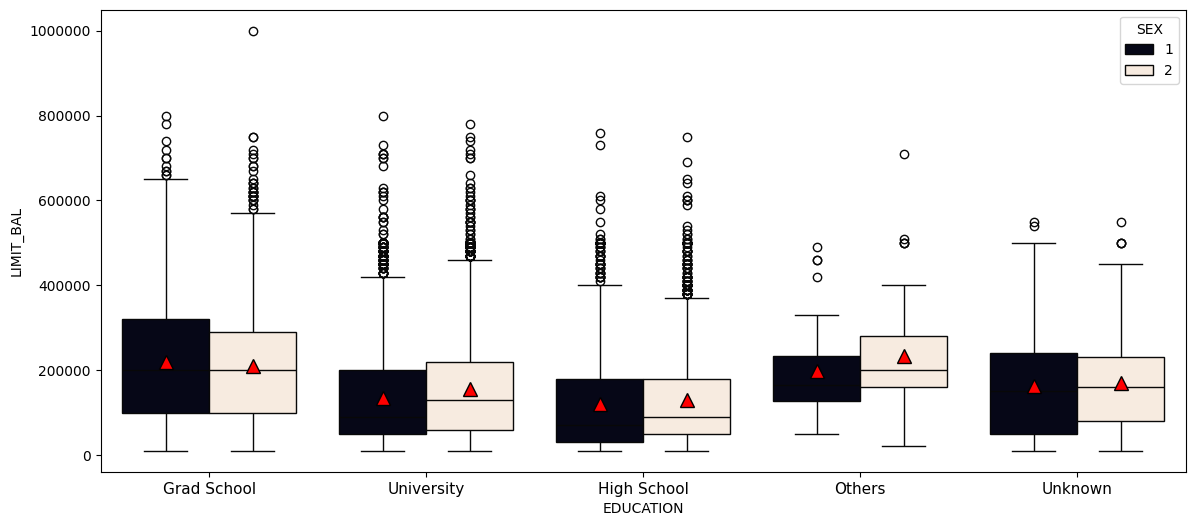

In [64]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()


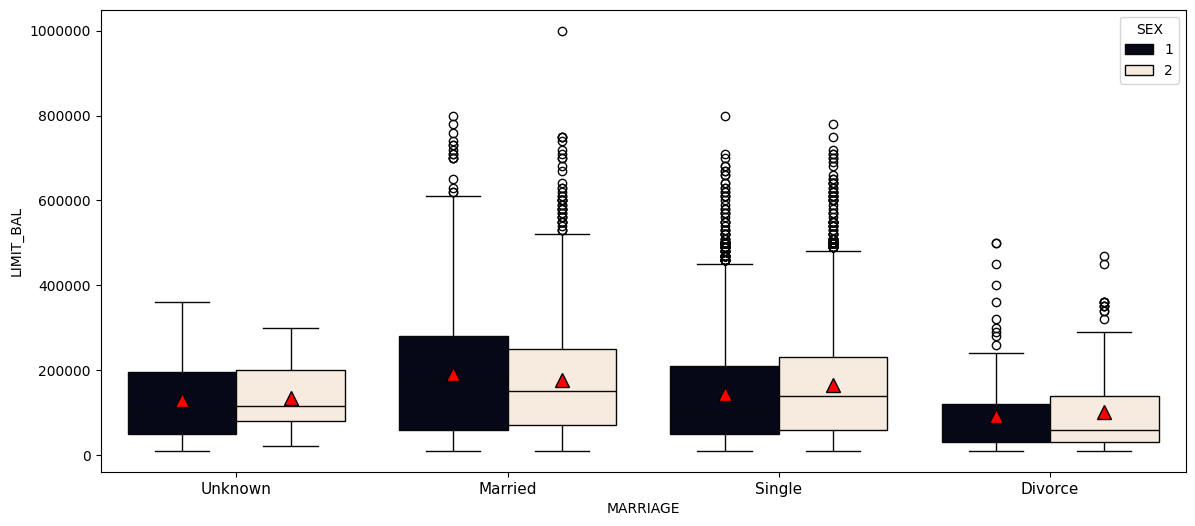

In [65]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

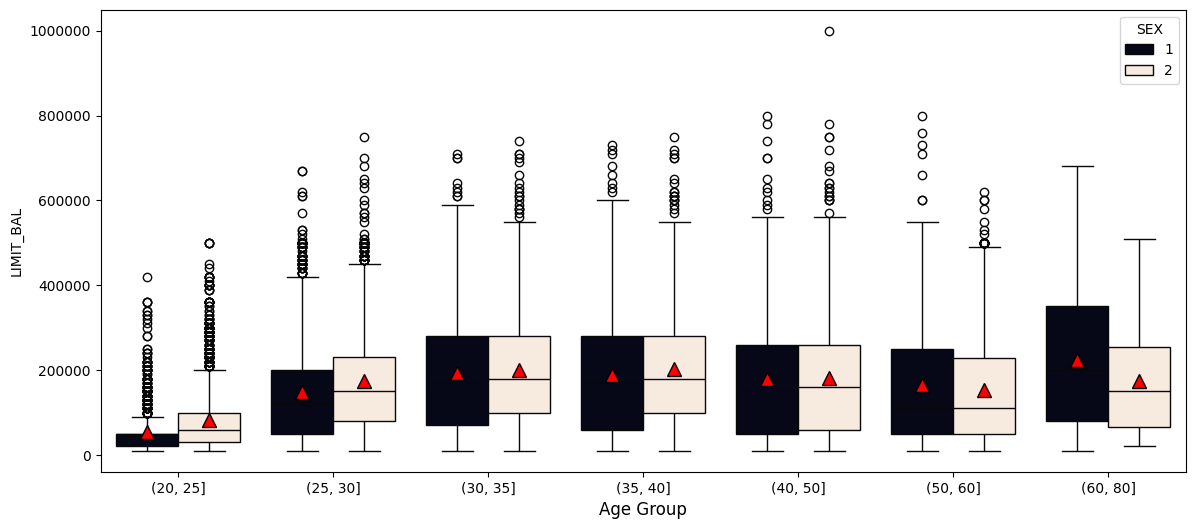

In [66]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

We saw earlier that the average given credit for women was slightly higher than for men. That still holds up for several combinations of categories, except among customers that:

## Repayment Status (PAY_X)

In [1]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

NameError: name 'plt' is not defined

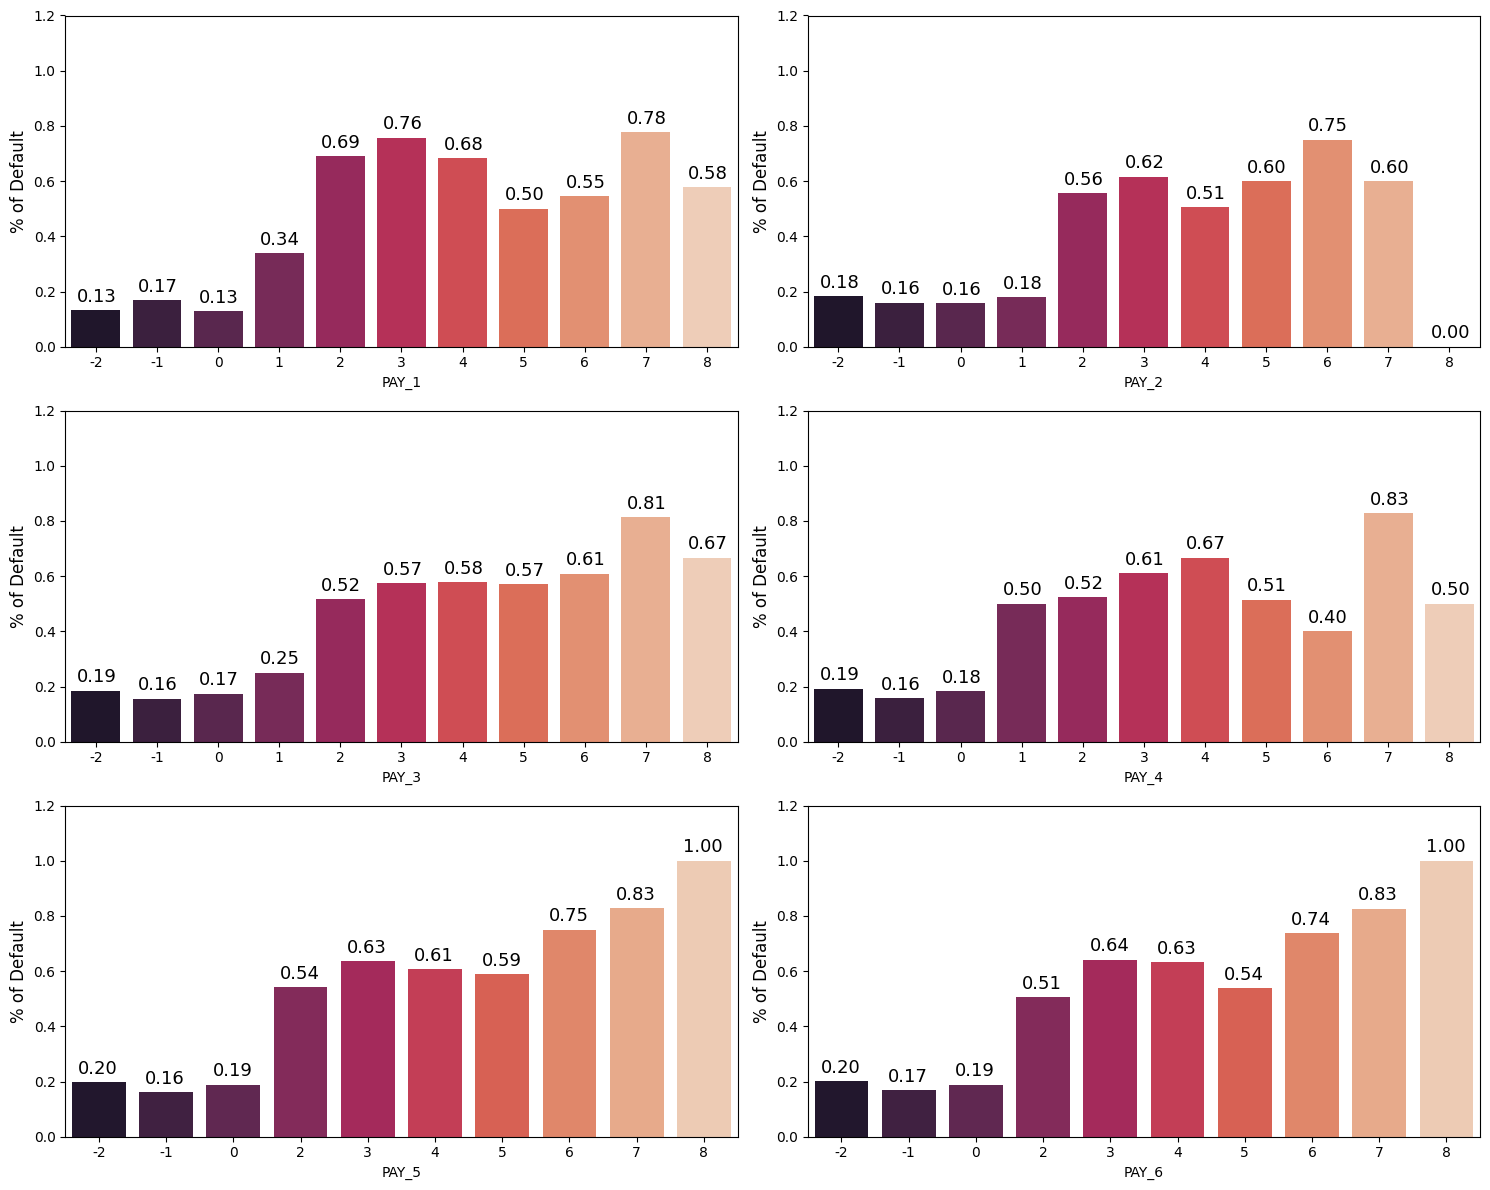

In [67]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()


Most customers are duly paying their credit card bills. And it's pretty clear that their likelihood of default are much lower than the rest.

Since there are only a few customers with 4+ months of delay in all PAY_X features, we could make a new analysis with them all together just to have the average default of a more significant group.

In [68]:

df['PAY_1_new'] = df['PAY_1'].copy()
df['PAY_2_new'] = df['PAY_2'].copy()
df['PAY_3_new'] = df['PAY_3'].copy()
df['PAY_4_new'] = df['PAY_4'].copy()
df['PAY_5_new'] = df['PAY_5'].copy()
df['PAY_6_new'] = df['PAY_6'].copy()

In [69]:

pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

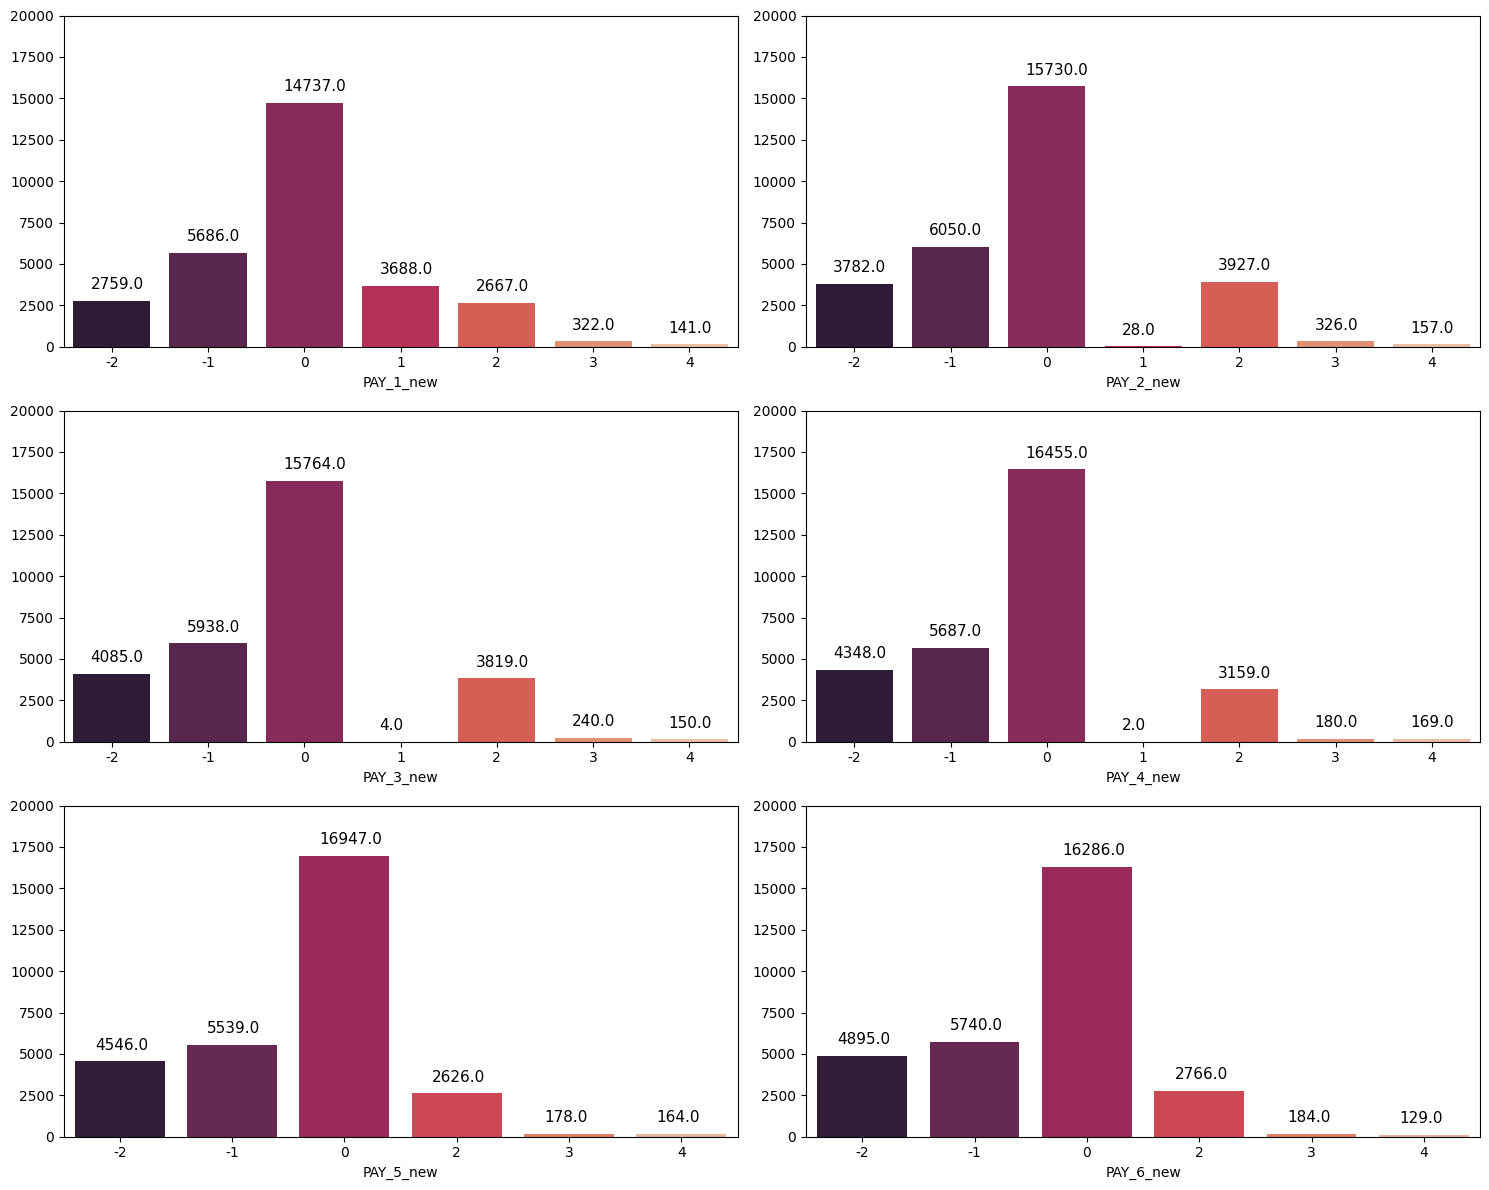

In [70]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

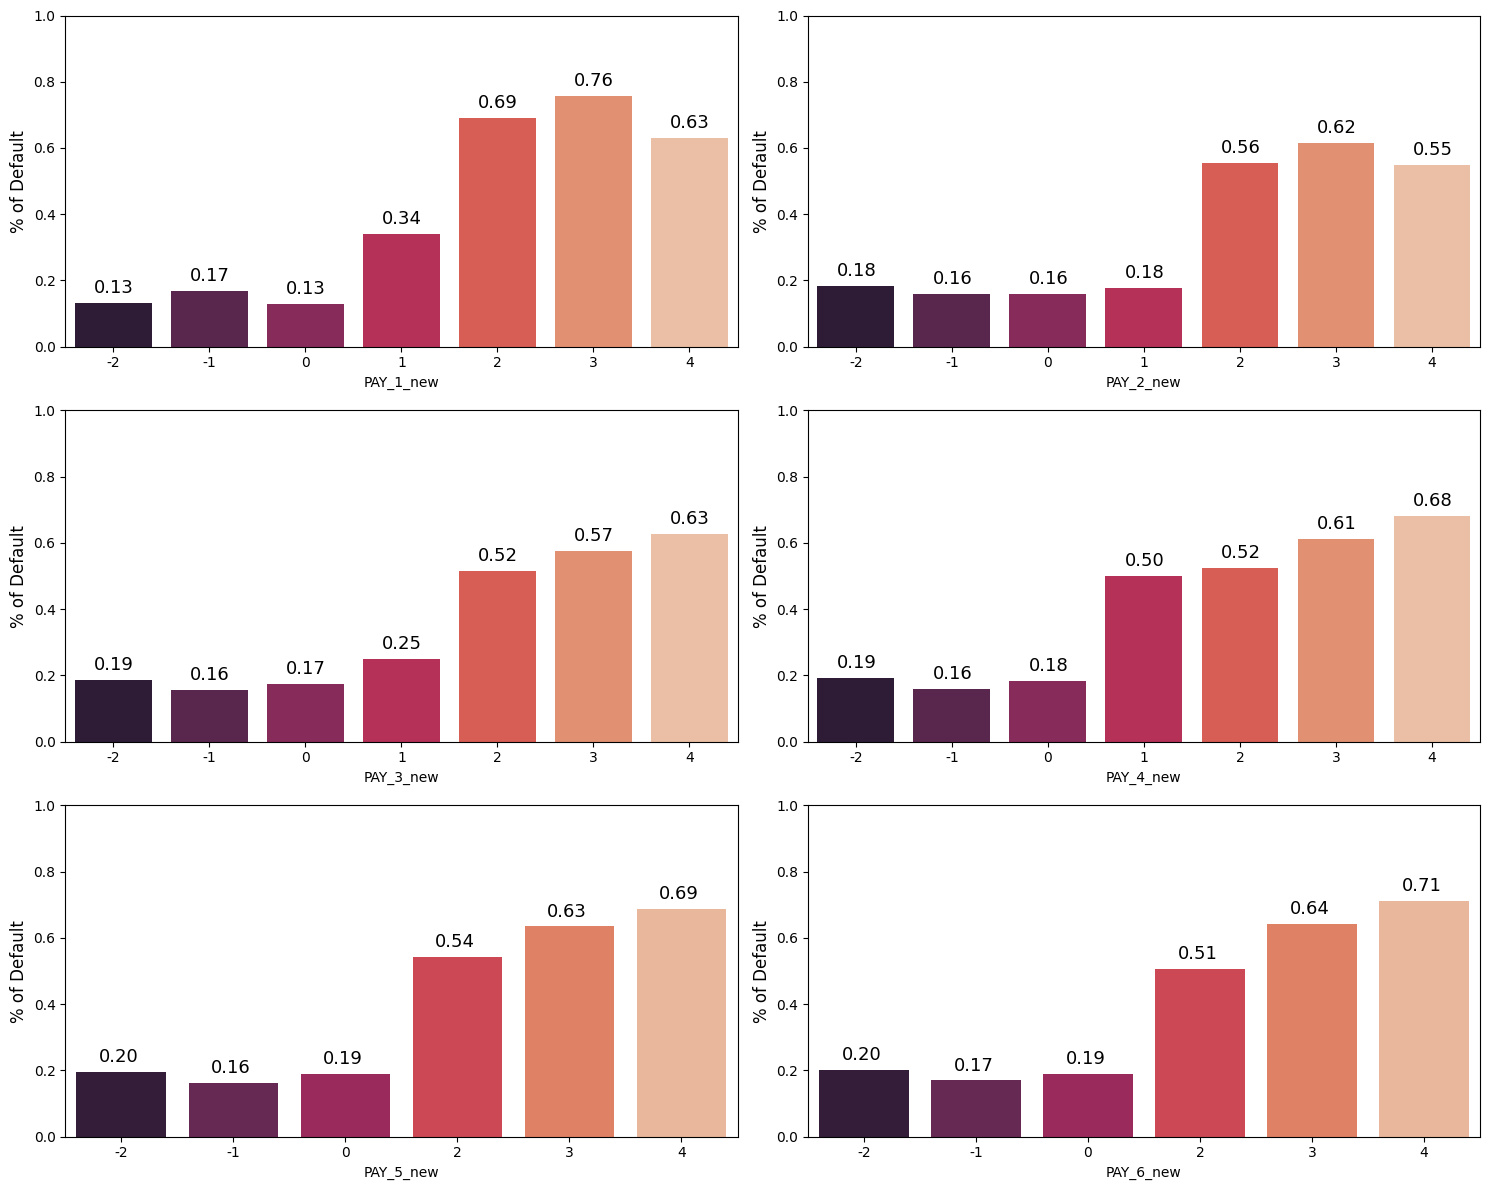

In [71]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03),fontsize=13)

plt.show()

## Amount of Bill Statement and Previous Payment

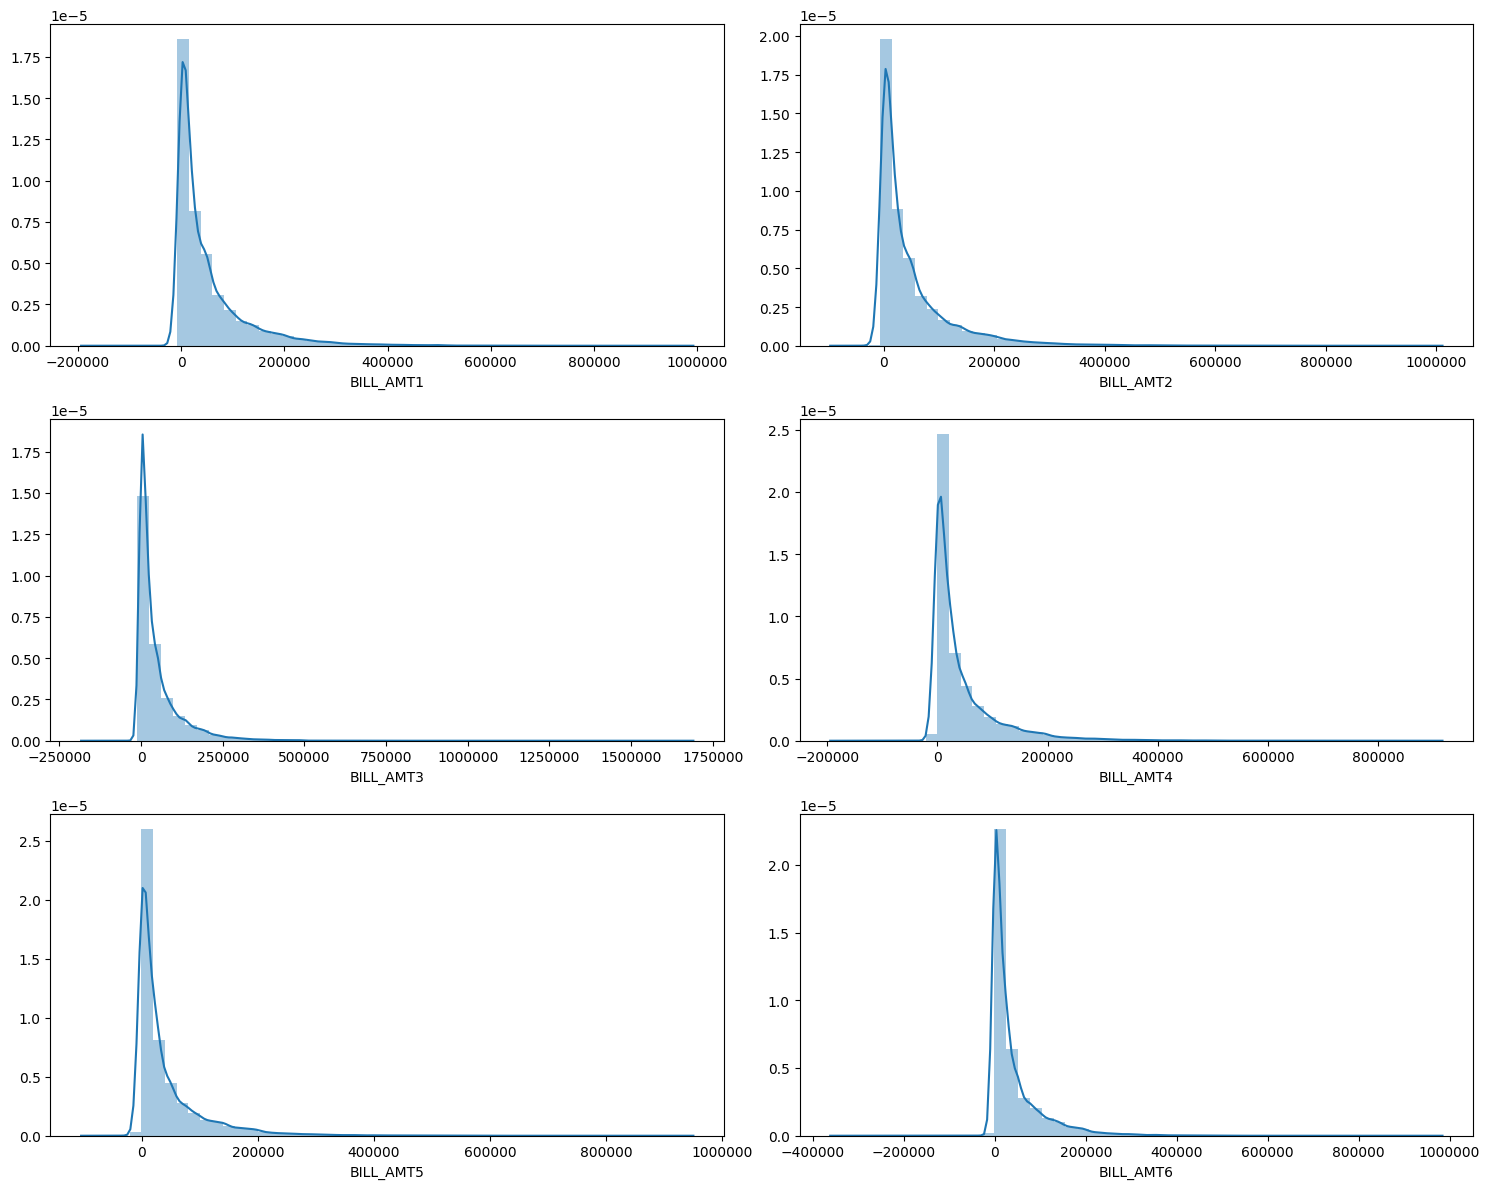

In [72]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

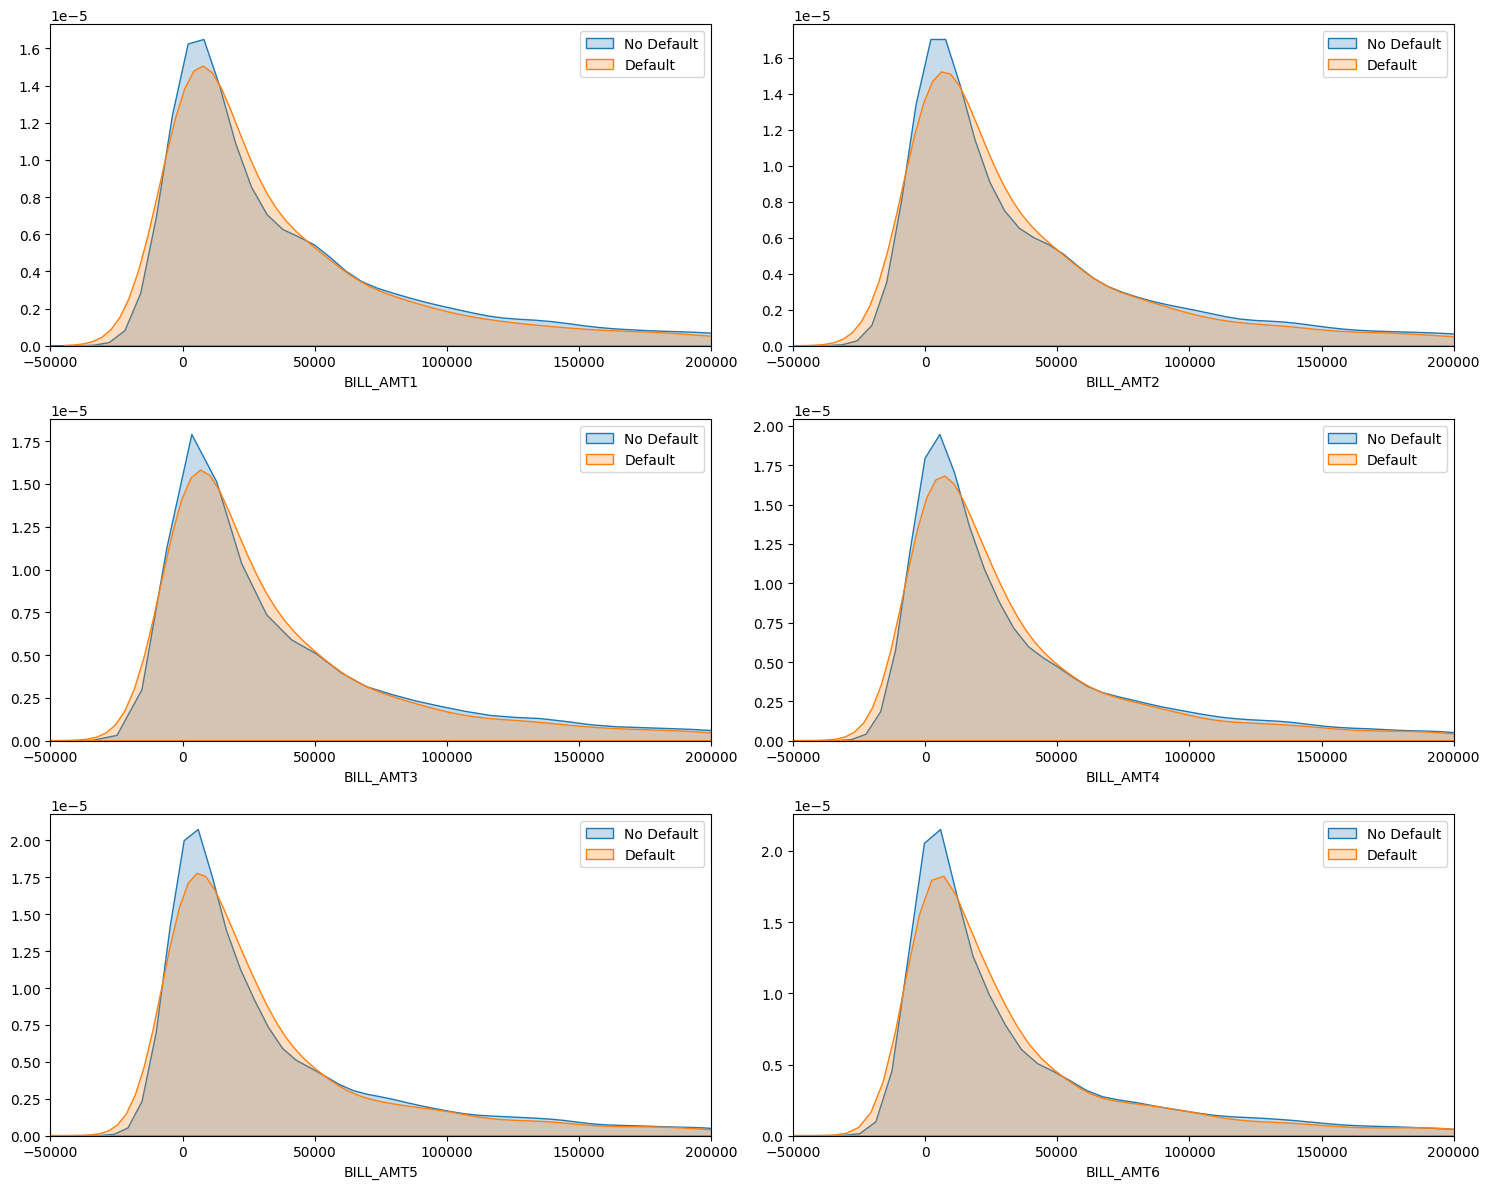

In [73]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [74]:
df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In [75]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

BILL_AMT1_bin
(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: count, dtype: int64
BILL_AMT2_bin
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: count, dtype: int64
BILL_AMT3_bin
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: count, dtype: int64
BILL_AMT4_bin
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: count, dtype: int64
BILL_AMT5_bin
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: count, dty

In [76]:
for col in bill_amtx_bins:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

BILL_AMT1_bin      Default
(-350000, -1]      0          0.815254
                   1          0.184746
(-1, 0]            0          0.734064
                   1          0.265936
(0, 25000]         0          0.774470
                   1          0.225530
(25000, 75000]     0          0.775209
                   1          0.224791
(75000, 200000]    0          0.802396
                   1          0.197604
(200000, 2000000]  0          0.797111
                   1          0.202889
Name: proportion, dtype: float64
BILL_AMT2_bin      Default
(-350000, -1]      0          0.810164
                   1          0.189836
(-1, 0]            0          0.753791
                   1          0.246209
(0, 25000]         0          0.775836
                   1          0.224164
(25000, 75000]     0          0.773531
                   1          0.226469
(75000, 200000]    0          0.799176
                   1          0.200824
(200000, 2000000]  0          0.790230
                

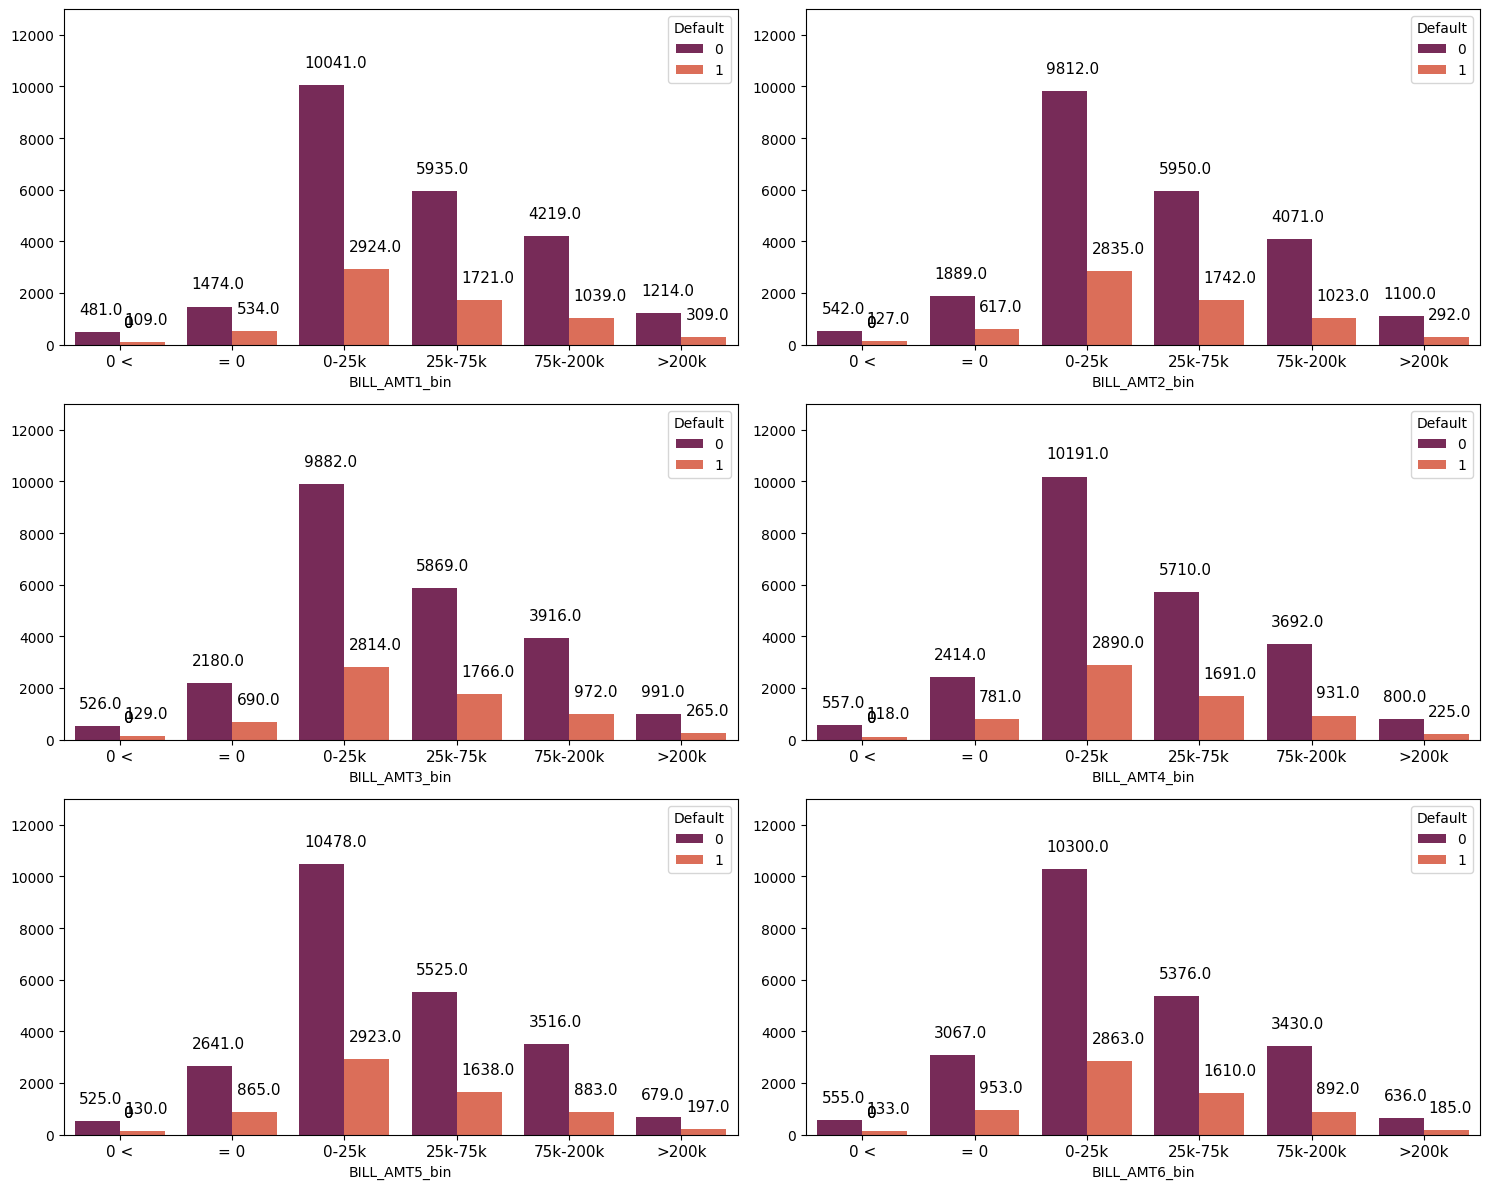

In [77]:
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

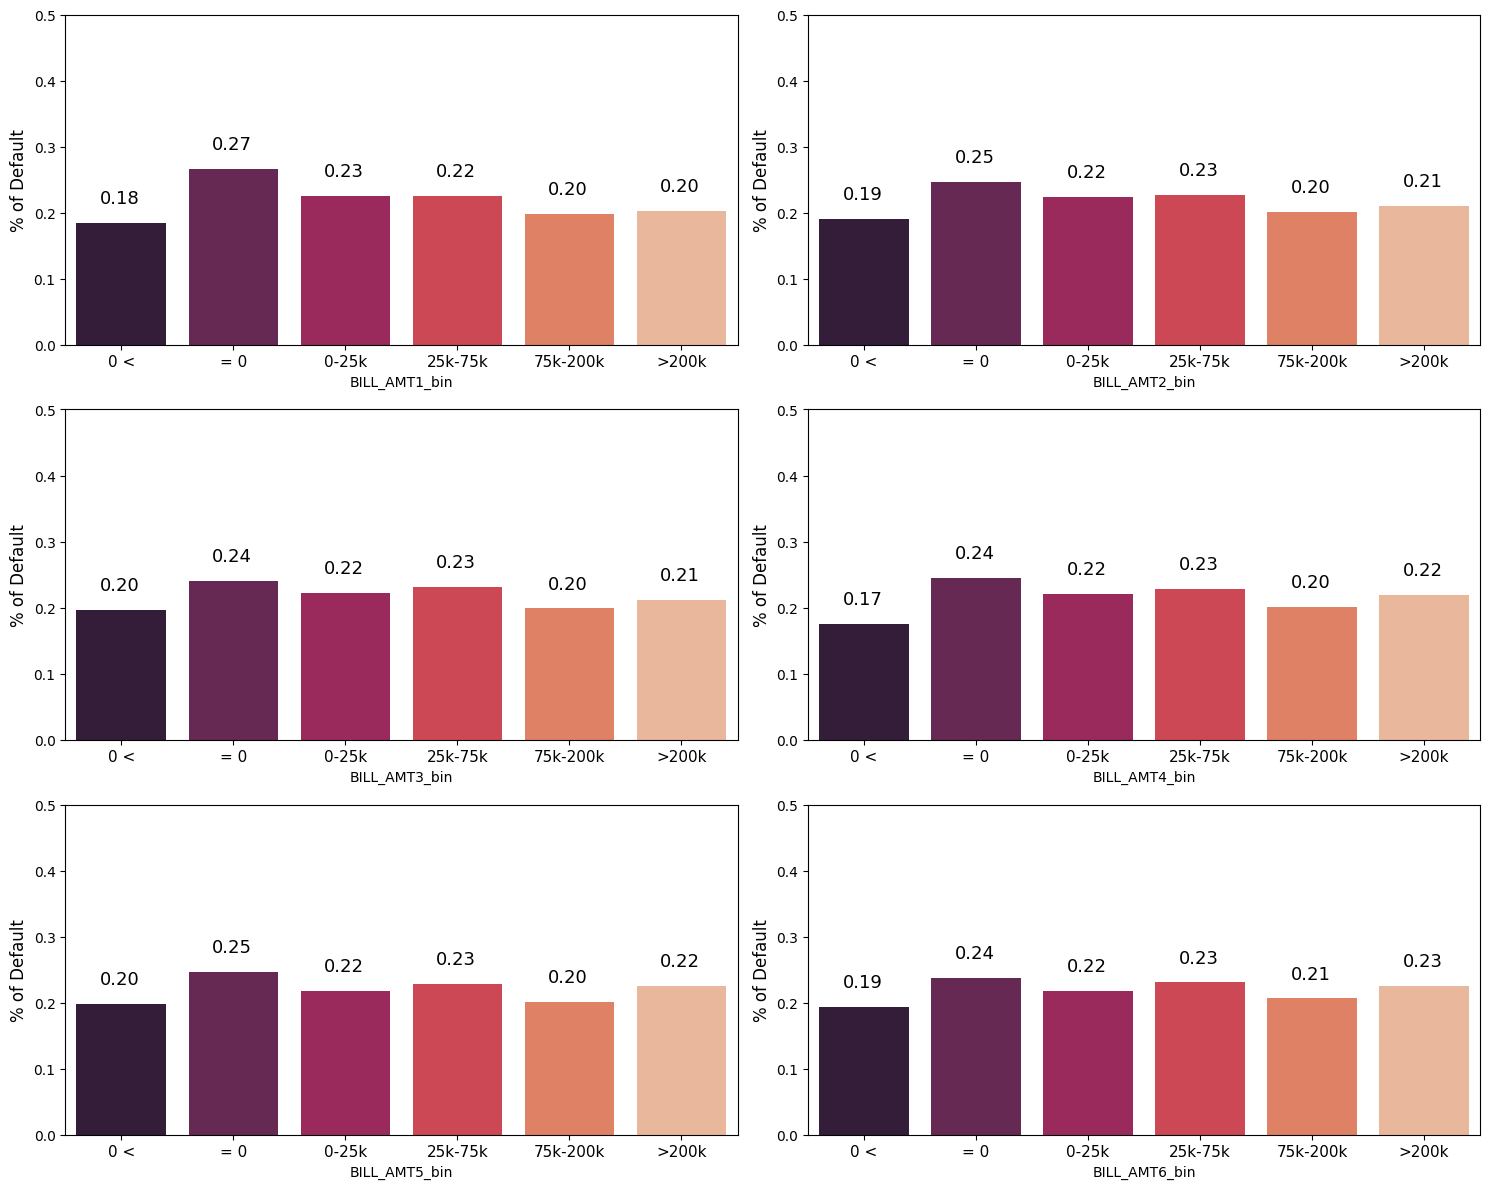

In [78]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

## Amount of Previous Payment (PAY_AMTX)

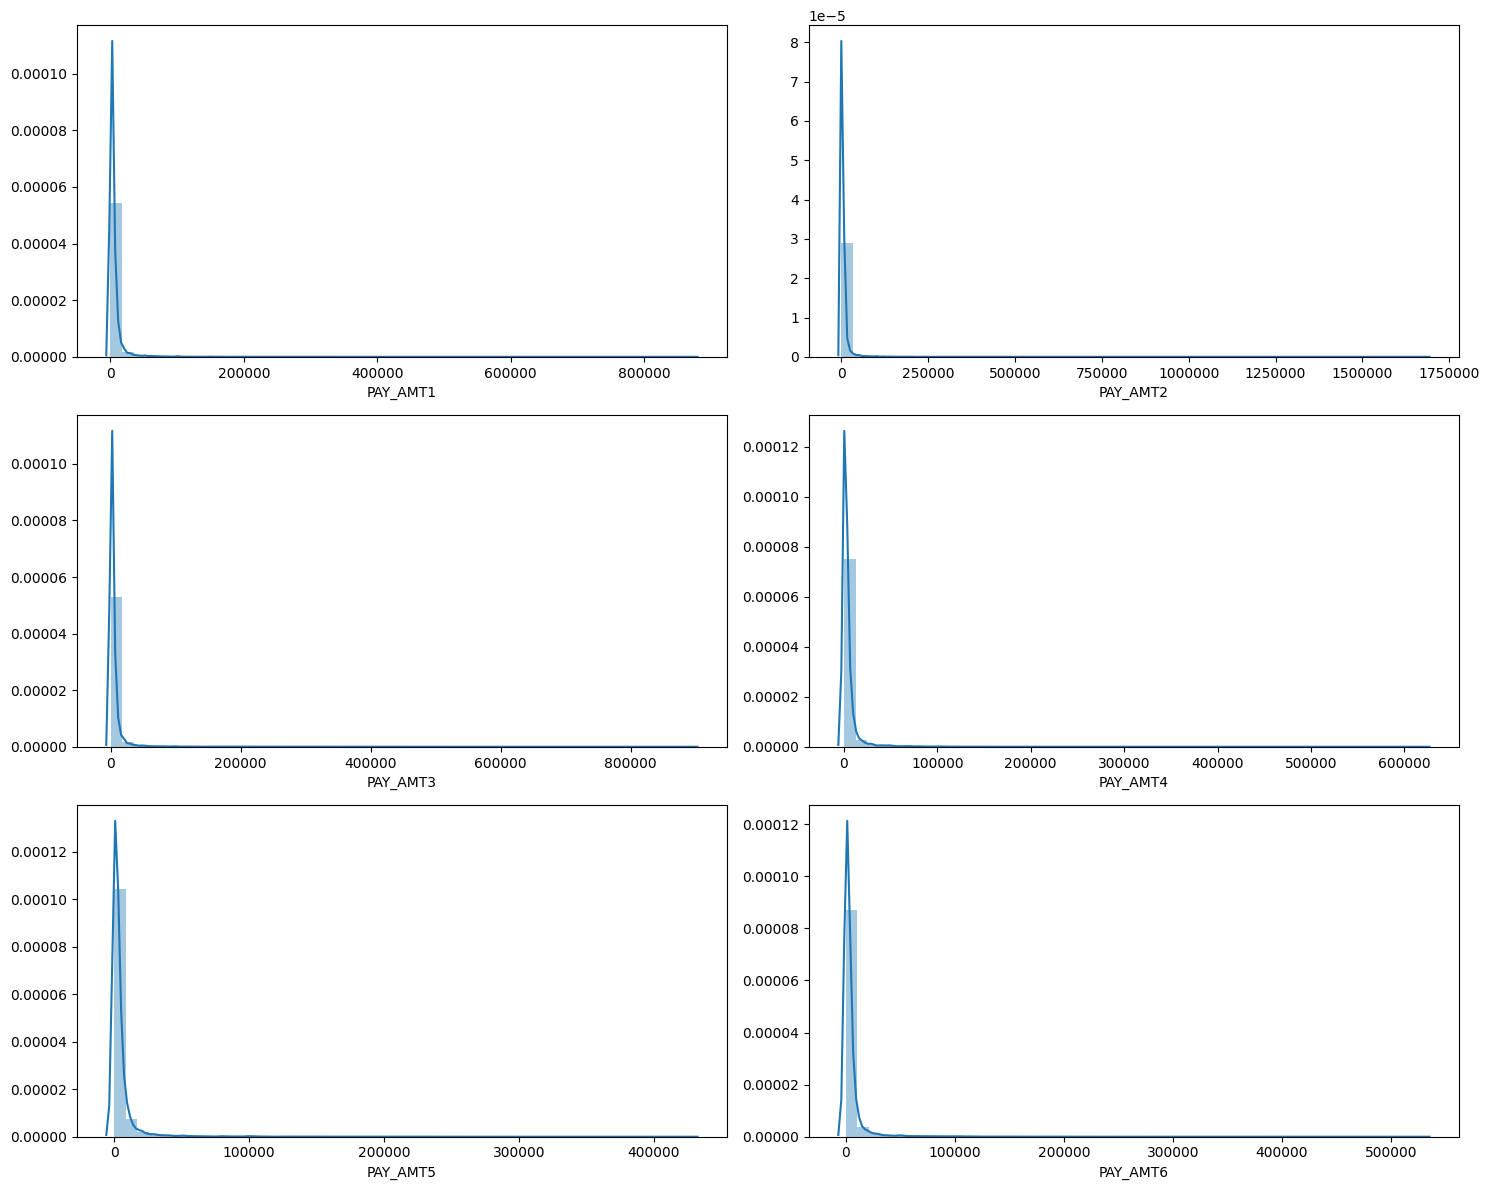

In [79]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

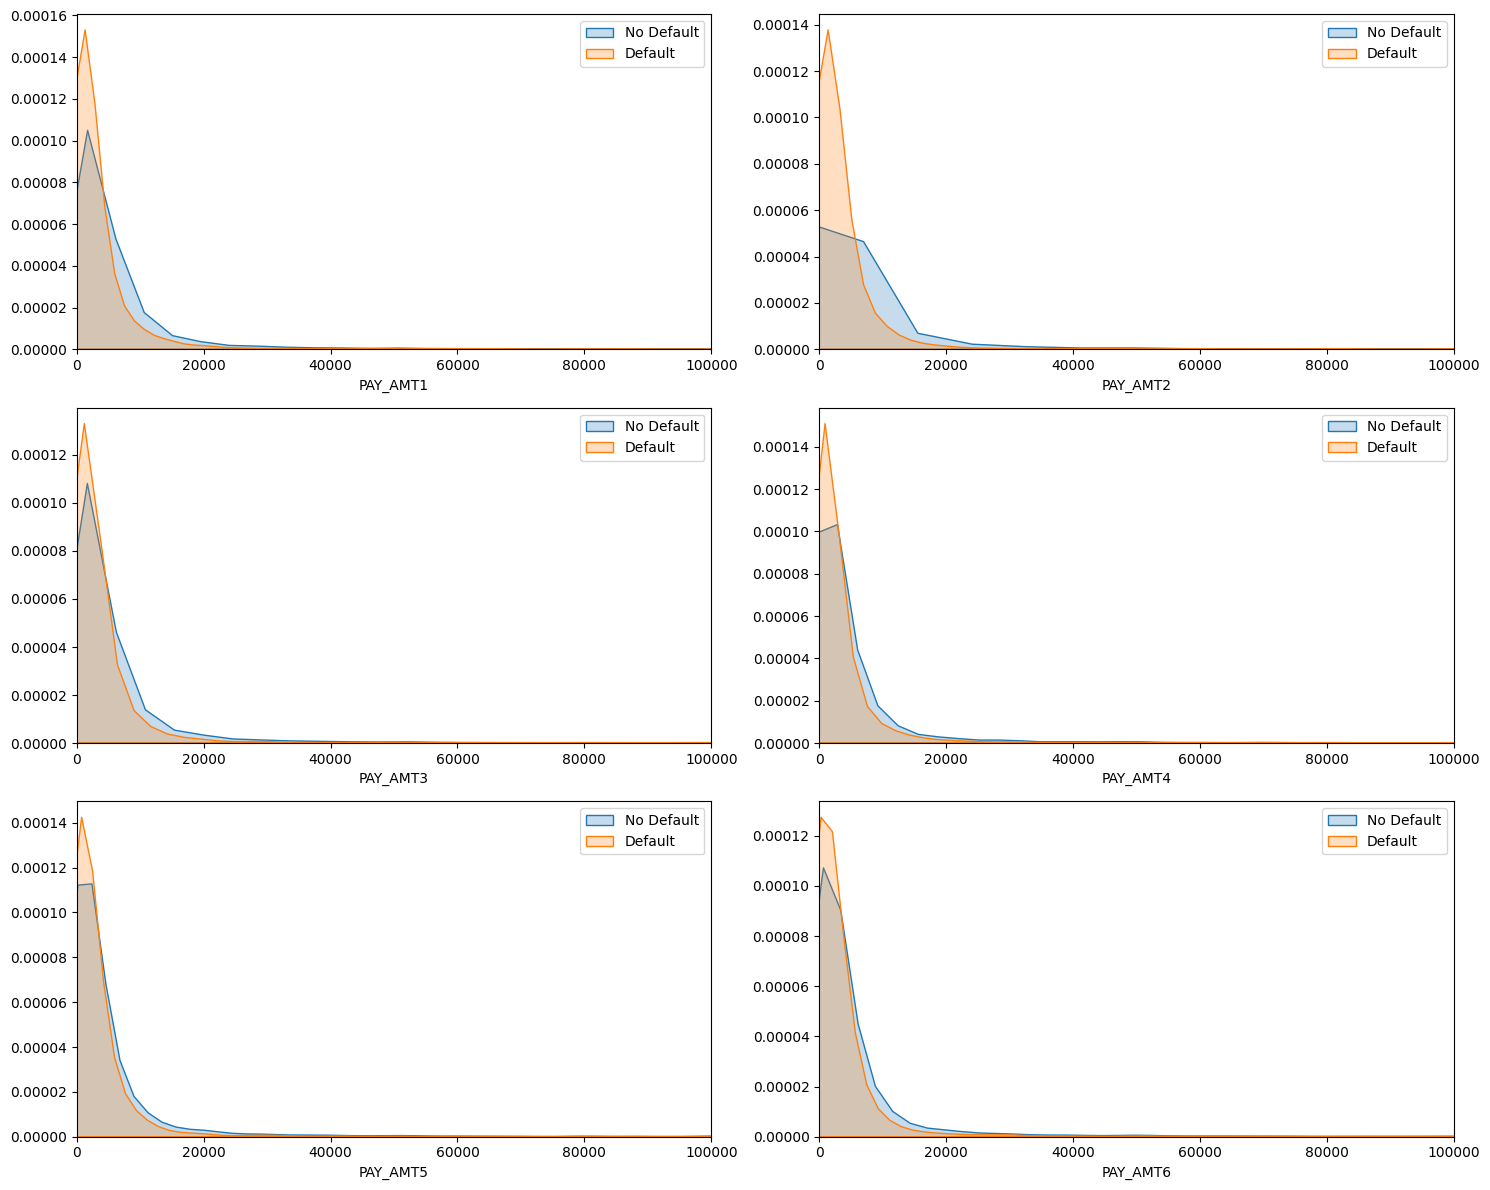

In [80]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [81]:
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In [82]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(df[col].value_counts())

PAY_AMT1_bin
(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: count, dtype: int64
PAY_AMT2_bin
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: count, dtype: int64
PAY_AMT3_bin
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: count, dtype: int64
PAY_AMT4_bin
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: count, dtype: int64
PAY_AMT5_bin
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: count, dtype: int64
PAY_AMT6_bin
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 

In [83]:
for col in pay_amtx_bins:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

PAY_AMT1_bin       Default
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 100000]    0          0.919255
                   1          0.080745
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: proportion, dtype: float64
PAY_AMT2_bin       Default
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 100000]    0          0.936396
                   1          0.063604
(100000, 2000000]  0          0.913265
                   1          0.086735
Name: proportion, dtype: float64
PAY_AMT3_bin       Default
(-1, 0]            0          0.676441
                   1          0.32

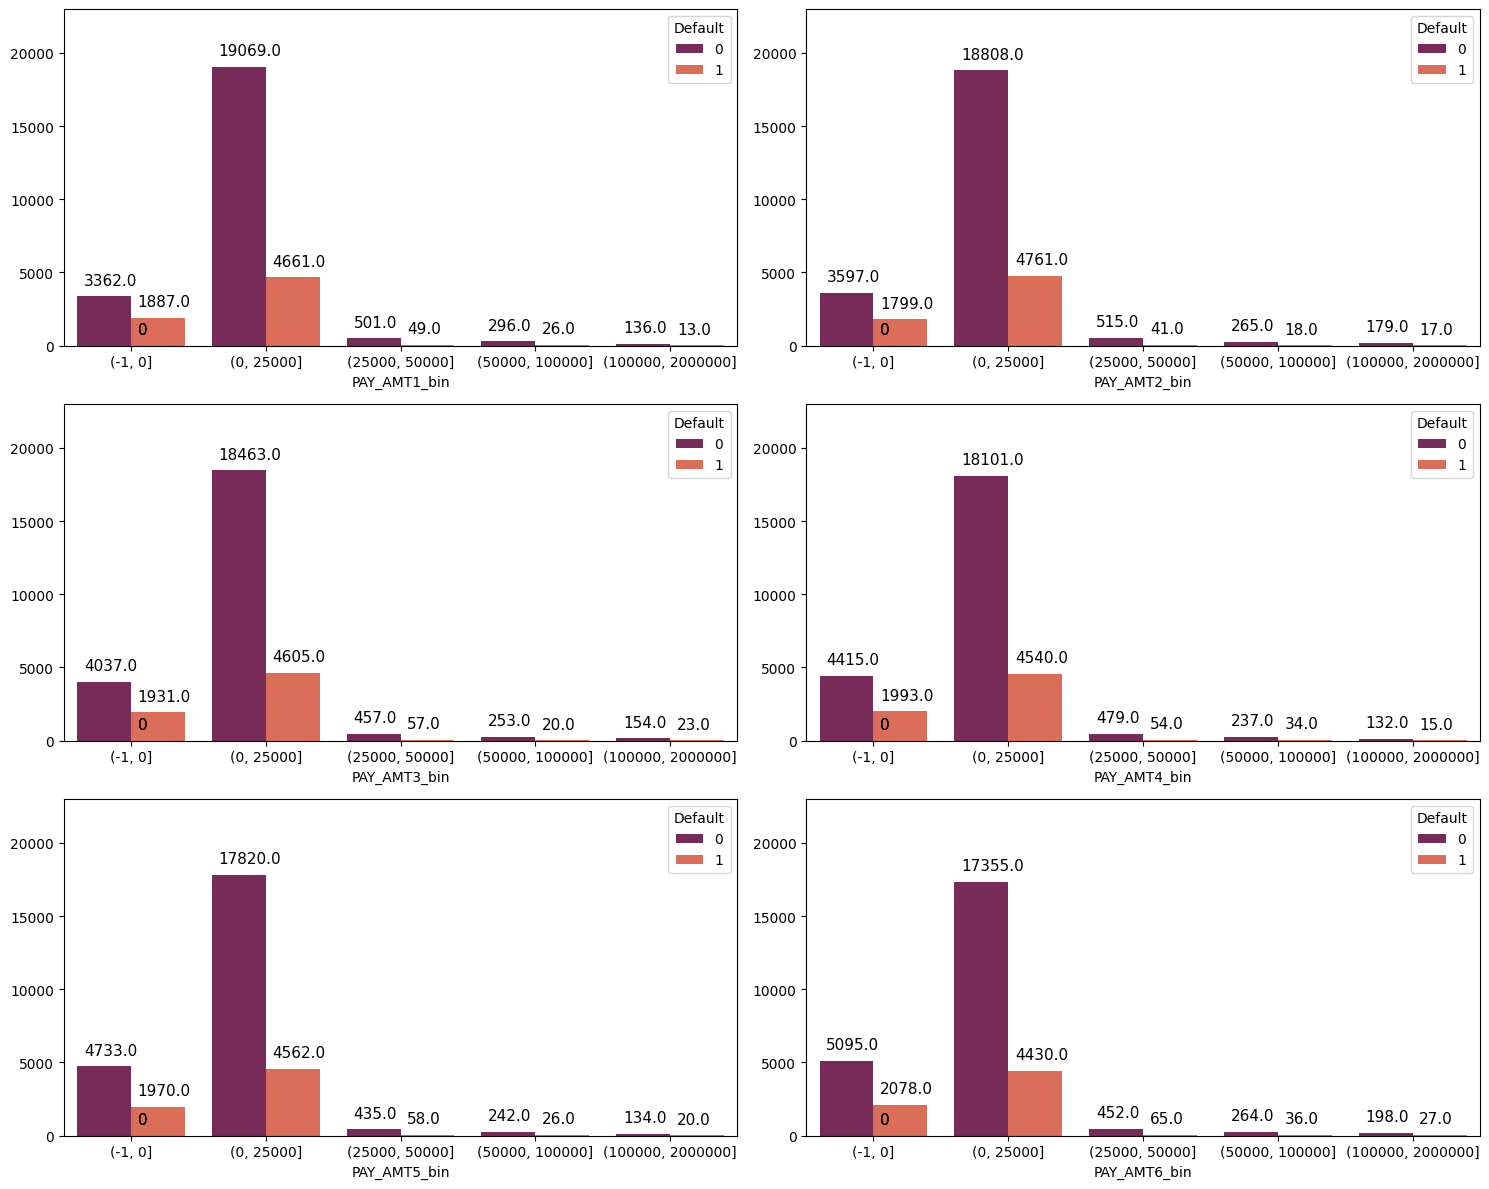

In [84]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()


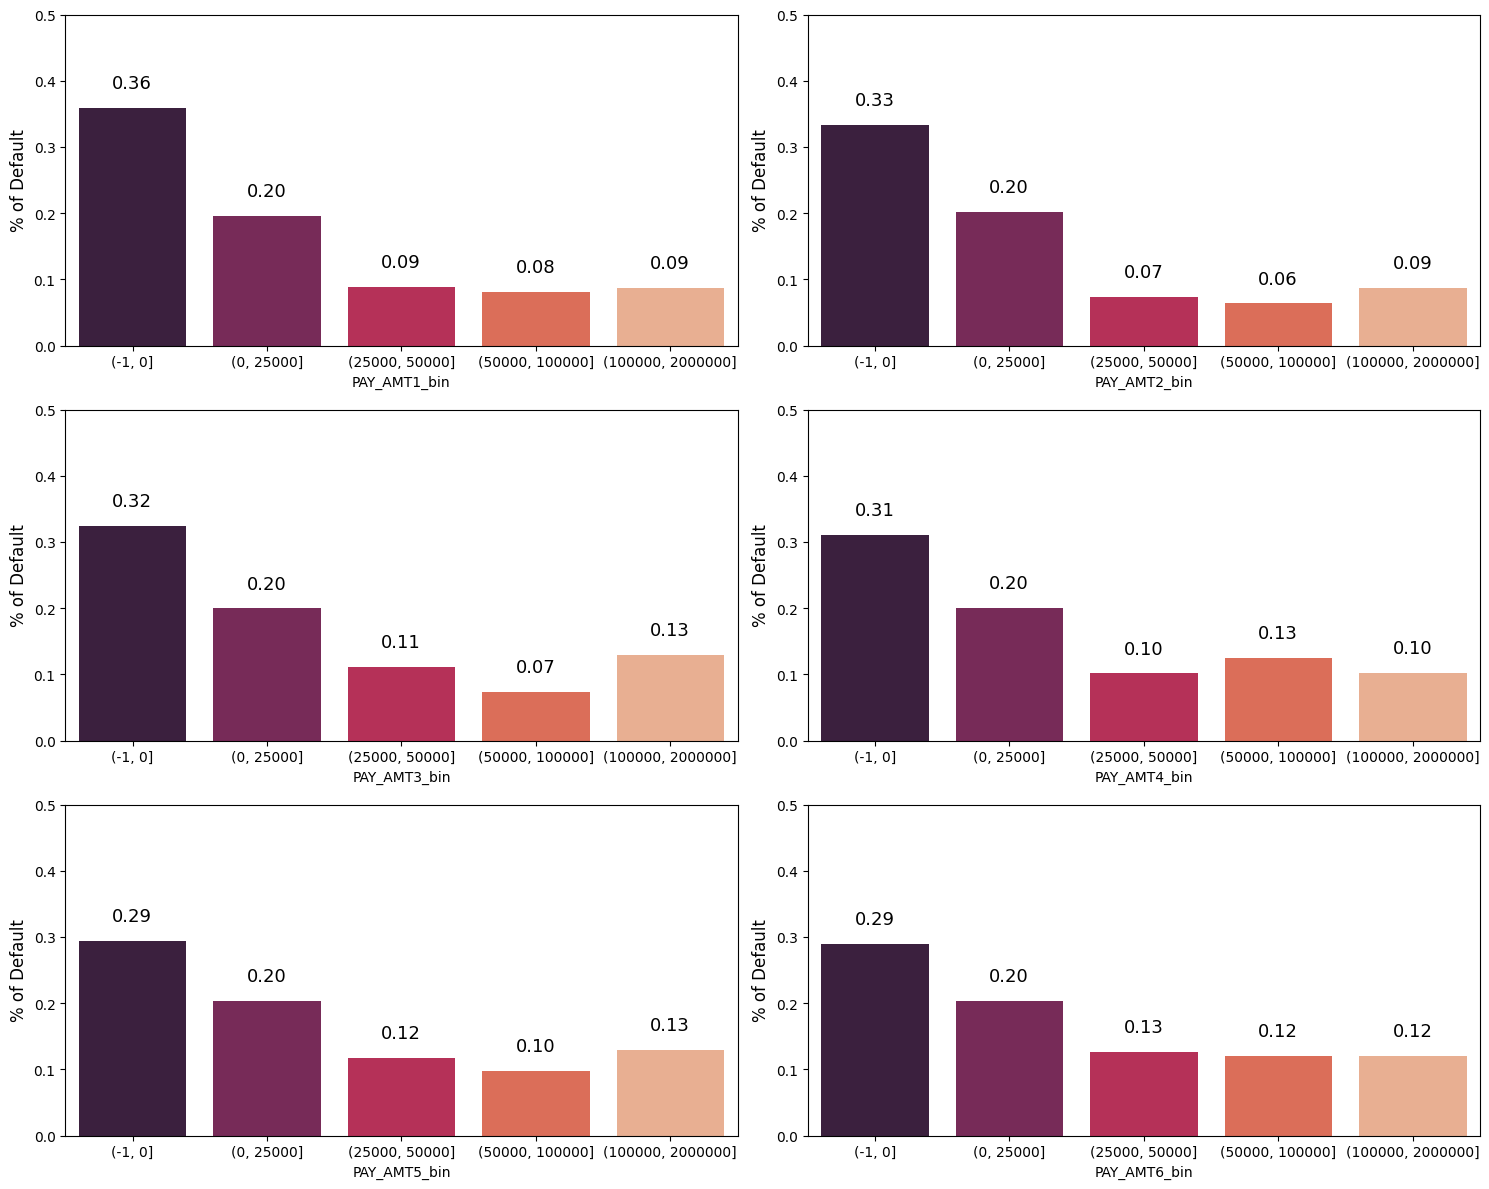

In [85]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()


There are no surprises in this group of features. There is a higher default rate among those who paid nothing in previous months and lower rates among those paid over 25k of NT dollars.

## Data Cleaning

In [86]:

X1 = df.copy().drop('Default', axis=1)
y = df['Default']

In [87]:

X1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
1,2,120000.0,2,2,2,26,-1,2,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
2,3,90000.0,2,2,2,34,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
3,4,50000.0,2,2,1,37,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,"(200000, 2000000]","(75000, 200000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]"
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,"(75000, 200000]","(25000, 75000]","(0, 25000]","(25000, 75000]","(50000, 100000]","(0, 25000]","(0, 25000]","(0, 25000]","(50000, 100000]","(0, 25000]"


In [93]:
X_base = X1.copy().drop(pay_x_new, axis = 1)
X_base = X_base.drop(bill_amtx_bins, axis = 1)
X_base = X_base.drop(pay_amtx_bins, axis = 1)
X_base = X_base.drop(['AgeBin', 'LimitBin','ID'], axis = 1)
X_base


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


## Observing Correlation between features of the Dataset

In [115]:
correlation = df.corr()

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

NameError: name 'correlation' is not defined

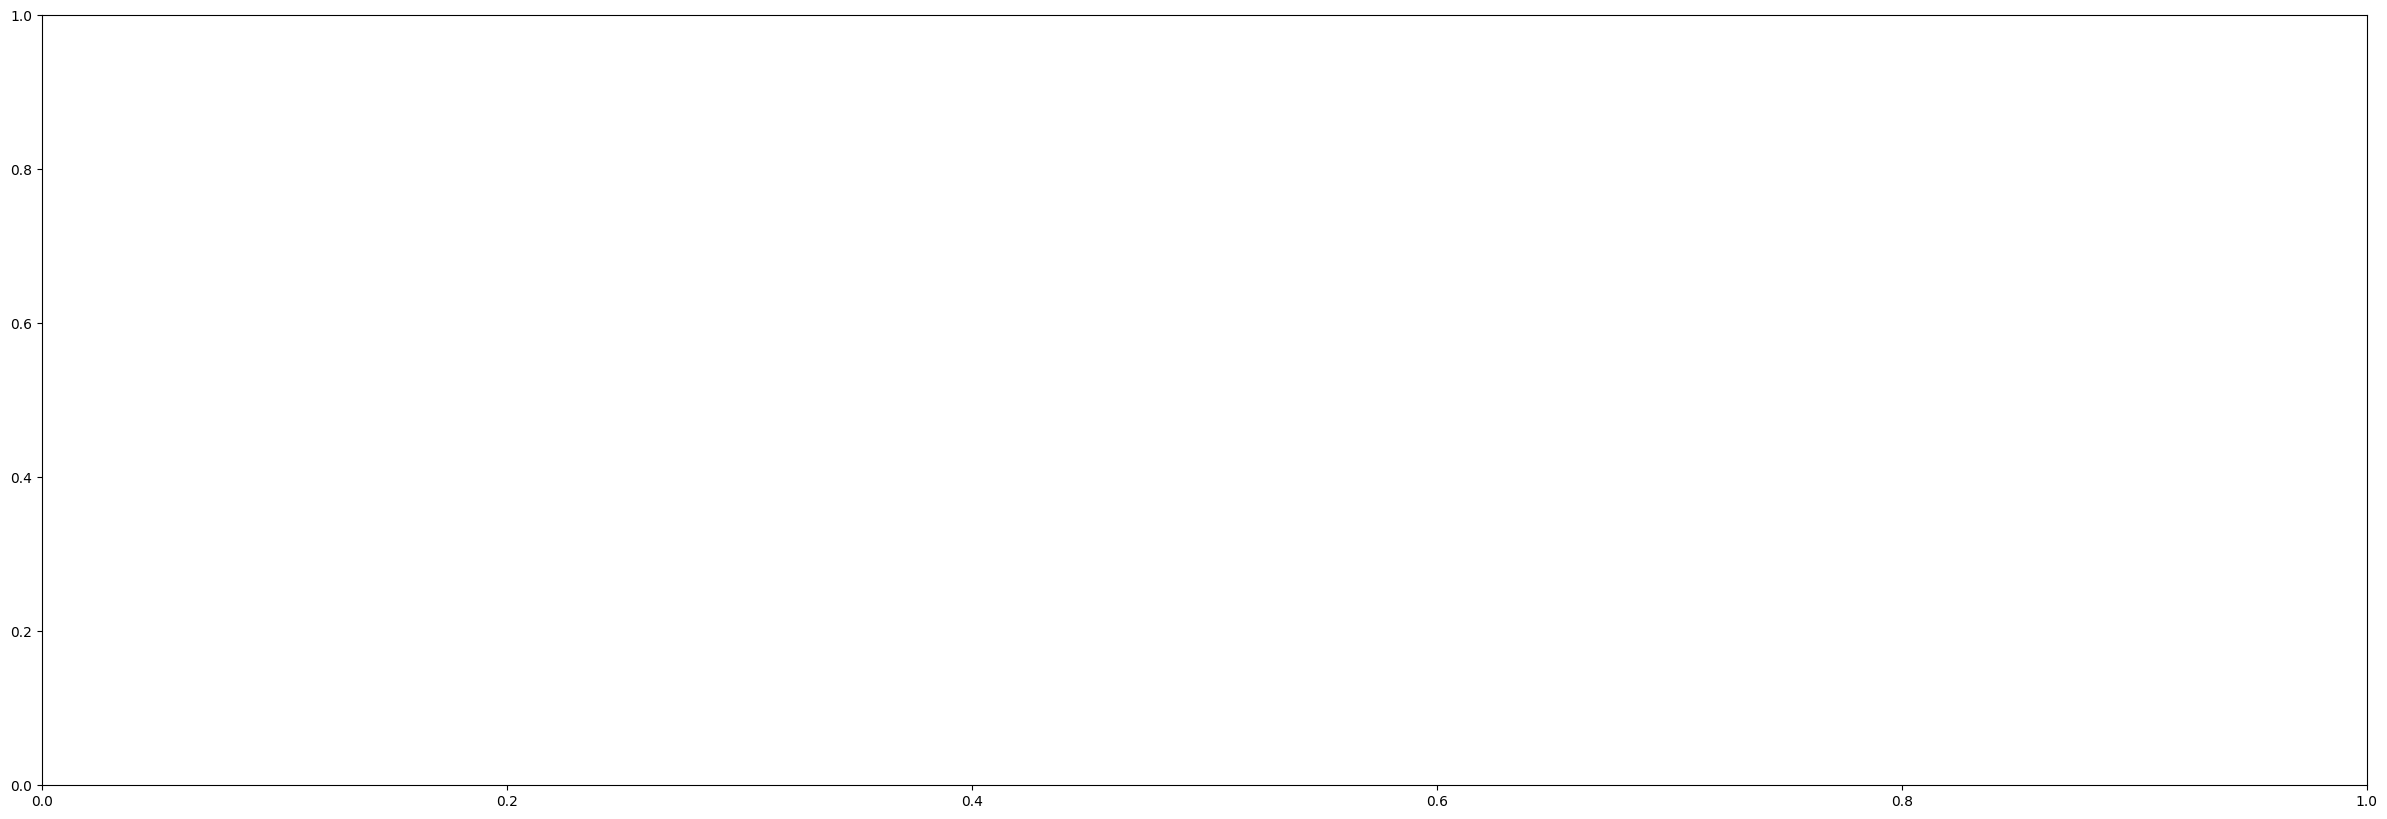

In [114]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

In [117]:
X1.corrwith(df['Default']).plot.bar(figsize = (20, 10), title = "Correlation with Default",fontsize = 20,rot = 90)

TypeError: unsupported operand type(s) for /: 'str' and 'int'


It looks like the PAY_ variables are the strongest predictors of default

# Model Building and Model Testing

## IMPORTING LIBARIES

In [120]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import seaborn as sns

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score


from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from importlib import reload  
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)
logging.info('We are starting the data analysis using Jupyter Notebook')

In [121]:
X=X_base
y=df['Default']

logging.info("first split the model then cheak with different different models who gives best result for our dataset")

In [122]:
# Splitting data into Train 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [123]:
X_train.shape ,y_train.shape

((24000, 23), (24000,))

In [124]:
X_test.shape,y_test.shape

((6000, 23), (6000,))

# Logistic Regression

In [125]:

logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

In [126]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.7725,0.0,0.0,0.0,0.5


# Stochastic Gradient Descent

In [134]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGDClassifier with the correct loss parameter
sgd = SGDClassifier(loss='log_loss', penalty='l1', learning_rate='optimal', random_state=1)

# Fit the model
sgd.fit(X_train, y_train)

# Predict the test set
y_pred = sgd.predict(X_test)


In [135]:
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Initialize model_results DataFrame if it doesn't exist
try:
    model_results
except NameError:
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])


In [138]:
# Create a DataFrame for the current results
results = pd.DataFrame([['Stochastic Gradient Descent', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Append the results to model_results using pd.concat
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the results
print(model_results)


                         Model  Accuracy  Precision  Recall  F1 Score  \
0          Logistic Regression  0.772500        0.0     0.0       0.0   
1  Stochastic Gradient Descent  0.772333        0.0     0.0       0.0   
2  Stochastic Gradient Descent  0.772333        0.0     0.0       0.0   
3  Stochastic Gradient Descent  0.772333        0.0     0.0       0.0   
4  Stochastic Gradient Descent  0.772333        0.0     0.0       0.0   

        ROC  
0  0.500000  
1  0.499892  
2  0.499892  
3  0.499892  
4  0.499892  


# K-Nearest Neighbour

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data
Initialise the value of k
For getting the predicted class, iterate from 1 to total number of training data points
Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class
Let's go ahead and use the elbow method to pick a good K Value!

In [139]:
error_rate = []

# it Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

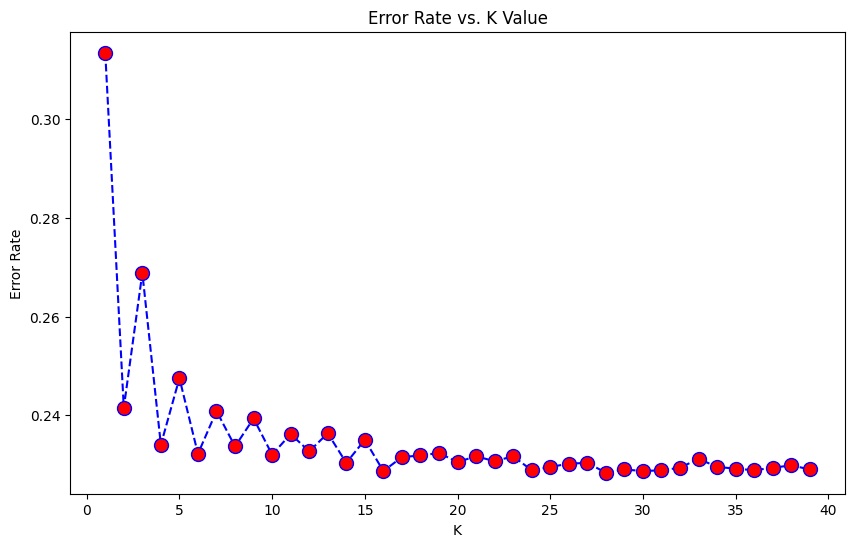

In [140]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from the plot we get that ,no 20 can gives better result for neighbors

In [141]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [143]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the current results
results = pd.DataFrame([['K-Nearest Neighbour', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize model_results DataFrame if it doesn't exist
try:
    model_results
except NameError:
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Append the results to model_results using pd.concat
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the results
print(model_results)


                         Model  Accuracy  Precision   Recall  F1 Score  \
0          Logistic Regression  0.772500   0.000000  0.00000  0.000000   
1  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
2  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
3  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
4  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
5          K-Nearest Neighbour  0.769500   0.460177  0.07619  0.130735   

        ROC  
0  0.500000  
1  0.499892  
2  0.499892  
3  0.499892  
4  0.499892  
5  0.524935  


# Support Vector Machine

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possib

In [144]:
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)
y_pred = scv.predict(X_test)

In [145]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4635,    0],
       [1365,    0]], dtype=int64)

In [148]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the current results
results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize model_results DataFrame if it doesn't exist
if 'model_results' not in locals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate results with model_results
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the results
print(model_results)


                         Model  Accuracy  Precision   Recall  F1 Score  \
0          Logistic Regression  0.772500   0.000000  0.00000  0.000000   
1  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
2  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
3  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
4  Stochastic Gradient Descent  0.772333   0.000000  0.00000  0.000000   
5          K-Nearest Neighbour  0.769500   0.460177  0.07619  0.130735   
6       Support Vector Machine  0.772500   0.000000  0.00000  0.000000   

        ROC  
0  0.500000  
1  0.499892  
2  0.499892  
3  0.499892  
4  0.499892  
5  0.524935  
6  0.500000  


# Gaussian Naive Bayes

In [149]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred =naive_bayes.predict(X_test)

In [150]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1094, 3541],
       [ 172, 1193]], dtype=int64)

In [154]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the current results
results = pd.DataFrame([['Gaussian Naive Bayes', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize model_results DataFrame if it doesn't exist
if 'model_results' not in locals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate results with model_results
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the results
print(model_results)


                         Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.772500   0.000000  0.000000  0.000000   
1  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
2  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
3  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
4  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
5          K-Nearest Neighbour  0.769500   0.460177  0.076190  0.130735   
6       Support Vector Machine  0.772500   0.000000  0.000000  0.000000   
7         Gaussian Naive Bayes  0.381167   0.252007  0.873993  0.391212   

        ROC  
0  0.500000  
1  0.499892  
2  0.499892  
3  0.499892  
4  0.499892  
5  0.524935  
6  0.500000  
7  0.555011  


# Decision Tree Classification

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees - Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees- Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [155]:
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)

In [156]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3818,  817],
       [ 821,  544]], dtype=int64)

In [157]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the current results
results = pd.DataFrame([['Decision Tree Classifier', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize model_results DataFrame if it doesn't exist
if 'model_results' not in locals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate results with model_results
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the results
print(model_results)


                         Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.772500   0.000000  0.000000  0.000000   
1  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
2  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
3  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
4  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
5          K-Nearest Neighbour  0.769500   0.460177  0.076190  0.130735   
6       Support Vector Machine  0.772500   0.000000  0.000000  0.000000   
7         Gaussian Naive Bayes  0.381167   0.252007  0.873993  0.391212   
8     Decision Tree Classifier  0.727000   0.399706  0.398535  0.399120   

        ROC  
0  0.500000  
1  0.499892  
2  0.499892  
3  0.499892  
4  0.499892  
5  0.524935  
6  0.500000  
7  0.555011  
8  0.611134  


# Random Forest Classification

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [158]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [159]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4398,  237],
       [ 883,  482]], dtype=int64)

In [161]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the current results
results = pd.DataFrame([['Random forest Classifier', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize model_results DataFrame if it doesn't exist
if 'model_results' not in locals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate results with model_results
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the updated model_results
print(model_results)


                         Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.772500   0.000000  0.000000  0.000000   
1  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
2  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
3  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
4  Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
5          K-Nearest Neighbour  0.769500   0.460177  0.076190  0.130735   
6       Support Vector Machine  0.772500   0.000000  0.000000  0.000000   
7         Gaussian Naive Bayes  0.381167   0.252007  0.873993  0.391212   
8     Decision Tree Classifier  0.727000   0.399706  0.398535  0.399120   
9     Random forest Classifier  0.813333   0.670376  0.353114  0.462572   

        ROC  
0  0.500000  
1  0.499892  
2  0.499892  
3  0.499892  
4  0.499892  
5  0.524935  
6  0.500000  
7  0.555011  
8  0.611134  
9  0.650990  


# XGBOOST classifier
It is Gradient Boosting Algorithm

In [162]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred =xgb.predict(X_test)

In [163]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4390,  245],
       [ 884,  481]], dtype=int64)

In [164]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming y_test and y_pred are already defined
# Calculate evaluation metrics
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the current results
results = pd.DataFrame([['XGBOOST Classifier', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize model_results DataFrame if it doesn't exist or is not a DataFrame
if not isinstance(model_results, pd.DataFrame):
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate results with model_results
model_results = pd.concat([model_results, results], ignore_index=True)

# Display the updated model_results
print(model_results)


                          Model  Accuracy  Precision    Recall  F1 Score  \
0           Logistic Regression  0.772500   0.000000  0.000000  0.000000   
1   Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
2   Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
3   Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
4   Stochastic Gradient Descent  0.772333   0.000000  0.000000  0.000000   
5           K-Nearest Neighbour  0.769500   0.460177  0.076190  0.130735   
6        Support Vector Machine  0.772500   0.000000  0.000000  0.000000   
7          Gaussian Naive Bayes  0.381167   0.252007  0.873993  0.391212   
8      Decision Tree Classifier  0.727000   0.399706  0.398535  0.399120   
9      Random forest Classifier  0.813333   0.670376  0.353114  0.462572   
10           XGBOOST Classifier  0.811833   0.662534  0.352381  0.460067   

         ROC  
0   0.500000  
1   0.499892  
2   0.499892  
3   0.499892  
4   0.499892

# Conclusion


1)Using a Logistic Regression classifier, we can predict with 77.7% accuracy, whether a customer is likely to default next month.

2)Using a Stochastic Gradient Descent classifier, we can predict with 77.1% accuracy, whether a customer is likely to default next month.

3)Using a K-Nearest Neighbour classifier, we can predict with 78.2% accuracy, whether a customer is likely to default next month.

4)Using a Support Vector Machine classifier, we can predict with 77.7% accuracy, whether a customer is likely to default next month.

5)Using a Gaussian Naive Bayes classifier, we can predict with 37.1% accuracy, whether a customer is likely to default next month.

5)Using a Decision Tree classifier, we can predict with 73.7% accuracy, whether a customer is likely to default next month.

6)Using a Random Forest classifier, we can predict with 81.3% accuracy, whether a customer is likely to default next month.

7)Using a XGBOOST classifier, we can predict with 81.6% accuracy, whether a customer is likely to default next month .
The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We found that using Random Forest and XGBOOST we can get better prediction.

Demographics:  we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.

In [168]:
#bicause of random forest gives the highest accuracy that's why we choose this model for our fiture prediction 
# Save the model to a file
pickle.dump(rfc, open('model.pkl', 'wb'))
logging.info("The model is now saved!")
logging.info("Made by 'Priyanka'")